<left> <font size=5 style='font-family:Courier New' color='Blue' > **Project 6 - Unsupervised Learning (Clustering):** 
<left> <font size=5 style='font-family:Courier New' color='Green' > **Bank Customers Segmentation**    

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Objective:** 
<br> <left> <font size=3 style='font-family:Courier New' color='Black'>
Identifying different segments of the existing Customers...

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Data Dictionary:** 
<left> <font size=3 style='font-family:Courier New' color='Black'>
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 1. **Sl_No**: Primary key of the records.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 2. **Customer Key**: Customer identification number.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 3. **Average Credit Limit**: Average credit limit of each customer for all credit cards.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 4. **Total credit cards**: Total number of credit cards possessed by the customer.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 5. **Total visits bank**: Total number of Visits that customer made (yearly) personally to the bank.
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 6. **Total visits online**: Total number of visits or online logins made by the customer (yearly).
<br> <left> <font size=3 style='font-family:Courier New' color='Black'> 7. **Total calls made**: Total number of calls made by the customer to the bank or its customer service department (yearly).

<left> <font size=6 style='font-family:Courier New' color='Orange' > **Case Understanding:** 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> The Problem is quite clear with small No. of Customer Attributes; Such attributes are classified into two major fields, One that describing the spending bahaviours of Custmeors, and the other one describing the channels in which the Customers tend to communicate with the Bank.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> In order to ba able to segment the Customers into distinct groups with similar characteristics, we must be able to find patterns that might influence the Customer behaviour while selection the type of contact that makes him feels more comfortable.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> Overall, we can expect different segments of Customers in terms of the No. of Credit Cards they hold where an increase in such No. indicate an increase in the Income and Richness of those Customers. Also, we can find those Customers who tend to make more contacts and explore if a relation is existing between an increase in the No. of Contacts and Richness Level in addition to the prefferable type of contact.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **1. Prework:**  

In [ ]:
# 1. Data Reading and Manipulating:
import numpy as np 
import pandas as pd 

# 2. Statistical Functions:
import scipy.stats as stats
import math

# 3. Data Visualization:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set()

# 4. Imputation:
from sklearn.impute import SimpleImputer , KNNImputer
                                   
# 5. Scaling:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

# 6. Distance Computation:
from scipy.spatial.distance import cdist , pdist

# 7. Clustering:
from sklearn.cluster import KMeans , AgglomerativeClustering

# 8. Performance Metrics:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet , dendrogram , linkage

# 9. Elbow Curve and Silhouette Score Visualization:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# 10. Expanding of Display: 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('mode.chained_assignment', None)

# 11. Suppressing Version Warnings:
import warnings
warnings.filterwarnings("ignore")

# 12. Grid Settings:
sns.set_style(style = 'whitegrid')

# 13. Code Structuring:
!pip install nb-black 

# 14. Calculate Execution Time:
import time

In [2]:
# Loading the Dataset:

dataset = pd.read_excel('Project_06_UnsupervisedLearning_BankCustomersSegmentation_Dataset.xlsx')

<left> <font size=6 style='font-family:Courier New' color='Orange' > **2. Sanity Check:**  

In [3]:
# Creating a Copy of the Dataset:

df=dataset.copy()

In [4]:
# Ensuring that everything is working as expected by displaying the First 5 Data Rows:

df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
# Ensuring that everything is working as expected by displaying the Last 5 Data Rows:

df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [6]:
# Examining the No. of Data Rows and Columns:

print('\033[0m', '\033[92m' , 'Dataset contains ' , 
      '\033[1m', '\033[91m' , df.shape[0] , 
      '\033[0m', '\033[92m' , ' Data Rows and ' , 
      '\033[1m', '\033[91m' , df.shape[1] , 
      '\033[0m', '\033[92m' , ' Columns.' , sep='')

Dataset contains 660 Data Rows and 7 Columns.


In [7]:
# Unifying the Column Names by replacing Inner Spaces with '_':

df.columns = [column.replace(" ", "_") for column in df.columns]

In [8]:
# Optional: Unifying the Column Names by Capitalizing the first Character in every Word:

df.columns = [column.title() for column in df.columns]

In [9]:
# Examining the Dataset Information and Data Types:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_Visits_Bank    660 non-null    int64
 5   Total_Visits_Online  660 non-null    int64
 6   Total_Calls_Made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [10]:
# Defining a Function (Summary) to display the Data Types, Calculate the No. of Non-Null, No. of Null, and No. of Zero Entries in the Dataset:

def summary(x):
    column = x.columns.values.tolist()
    dtype = [x[i].dtypes for i in x.columns]
    non_null = [x[i].notnull().sum() for i in column]
    null = [x[i].isnull().sum() for i in column]
    zero = [x[i].eq(0).sum() for i in column]
    summary_df = pd.DataFrame(data = {'Column Name' : column ,
                                      'Column Type' : dtype ,
                                      'Non-Null Entries' : non_null , 
                                      'Null Entries' : null , 
                                      'Zero Entries' : zero})
    return summary_df

summary(df)

,Column Name,Column Type,Non-Null Entries,Null Entries,Zero Entries
0,Sl_No,int64,660,0,0
1,Customer_Key,int64,660,0,0
2,Avg_Credit_Limit,int64,660,0,0
3,Total_Credit_Cards,int64,660,0,0
4,Total_Visits_Bank,int64,660,0,100
5,Total_Visits_Online,int64,660,0,144
6,Total_Calls_Made,int64,660,0,97


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Dataset consists of 660 Data Rows and 7 Columns/Features.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** There is no Column with Missing Entries.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** All Columns have Integer Data Type, no Type Transformation is required.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** There are 3 Columns with Zero Entries; It's quite normal to have Customers with such behaviour, such customers haven't made any type of communication with the Bank! Neither phesically nor digitally.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5:** Sl_No Column adds Zero Value to the Dataset; It can be dropped safely without affecting our analysis.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6:** Also, Customer_Key Column adds another Zero Value to the Dataset; It can be dropped safely without affecting our analysis - Will be more investigated by showing Unique Contents.

In [11]:
# Examiningthe Dataset against duplicate Data Rows:

dup = df.duplicated().sum()
print('\033[0m', '\033[92m' , 'There are ' , 
      '\033[1m', '\033[91m' , dup , 
      '\033[0m', '\033[92m' , ' Duplicate Data Rows in the Dataset.' , sep='')

There are 0 Duplicate Data Rows in the Dataset.


In [12]:
# Checking the No. of Unique Values in each Columns:

for i in df.columns:
    print('\033[0m' , '\033[92m' , 'No. of Unique Values (' , 
          '\033[0m' , '\033[91m' , i ,  
          '\033[0m' , '\033[92m' , '): ' , 
          '\033[1m' , '\033[92m' , df[i].nunique() , sep='')

No. of Unique Values (Sl_No): 660
No. of Unique Values (Customer_Key): 655
No. of Unique Values (Avg_Credit_Limit): 110
No. of Unique Values (Total_Credit_Cards): 10
No. of Unique Values (Total_Visits_Bank): 6
No. of Unique Values (Total_Visits_Online): 16
No. of Unique Values (Total_Calls_Made): 11


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Sl_No Column: No. of Unique Values equals to  No. of Data Rows, this Column can be dropped safely since it does not add any value or common attributes between Data Rows/Customers.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Customer_Key Column: No. of Unique Values equals (Approximately) to the No. of Data Rows, this Column must be deeply investigated to verify the contents of Data Rows (5 Data Rows have the same Customer_Key).

In [13]:
# Dropping the sl_no Column:

df.drop(['Sl_No'] , axis = 1 , inplace=True)

In [14]:
# Investigating the Data Rows that sharing the same customer_key:

df[df["Customer_Key"].duplicated(keep=False)].sort_values("Customer_Key")

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Each pair of Data Rows with the same Customer_Key has different attributes.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** In addition, Customer_Key Column doesn't have any impact on Customer Attributes in terms of grouping them into similar categories and looks like another Unique Identifier just same as Sl_No Column.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Thus, Dropping Customer_Key Column might be the best senario and keeping the 10 Data Rows because of their different contents.

In [15]:
# Dropping the customer_key Column:

df.drop(['Customer_Key'] , axis = 1 , inplace=True)

In [16]:
# Ensuring that everything is working as expected after dropping the Sl_No and Customer_Key Columns by displaying the first 5 Data Rows:

df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [17]:
# Verifying the statistics of Numerical Columns:

df.describe().T.apply(lambda s: s.apply('{0:.3f}'.format))

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.000,34574.242,37625.488,3000.000,10000.000,18000.000,48000.000,200000.000
Total_Credit_Cards,660.000,4.706,2.168,1.000,3.000,5.000,6.000,10.000
Total_Visits_Bank,660.000,2.403,1.632,0.000,1.000,2.000,4.000,5.000
Total_Visits_Online,660.000,2.606,2.936,0.000,1.000,2.000,4.000,15.000
Total_Calls_Made,660.000,3.583,2.865,0.000,1.000,3.000,5.000,10.000


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.1:** Avg_Credit_Limit is varying between 3,000 and 200,000 with an Average of 34,574; Heavy Right Skewness is expected.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.2:** 75% of Customers have a maximum Avg_Credit_Limit of 48,000. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.3:** Extreme Values are expected; However, such values will be investigated to find if high No. of Credit Cards has led to such higher Averages.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.1:** Total_Credit_Cards is varying between 1 and 10 with an Average of 5 (Rounded Up); Lettle Right Skewness is expected.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.2:** 75% of Customers have a maximum 0f 6 Credit Cards. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.3:** No Extreme Values are expected.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.1:** Total_Visits_Bank is varying between 1 and 5 with an Average of 2 (Rounded Down); No Skewness is expected.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.2:** 75% of Customers have a maximum 0f 4 Visits. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.3:** No Extreme Values are expected.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.1:** Total_Visits_Online is varying between 0 and 15 with an Average of 3 (Rounded Up); Heavy Right Skewness is expected.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.2:** 75% of Customers have a maximum 0f 4 Visits. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.3:** Extreme Values are expected.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.1:** Total_Calls_Made is varying between 0 and 10 with an Average of 4 (Rounded Up); Little Right Skewness is expected.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.2:** 75% of Customers have a maximum 0f 5 Calls. 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.3:** Extreme Values are expected.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **3. Univariate Analysis:**

Count Plot: Total_Credit_Cards


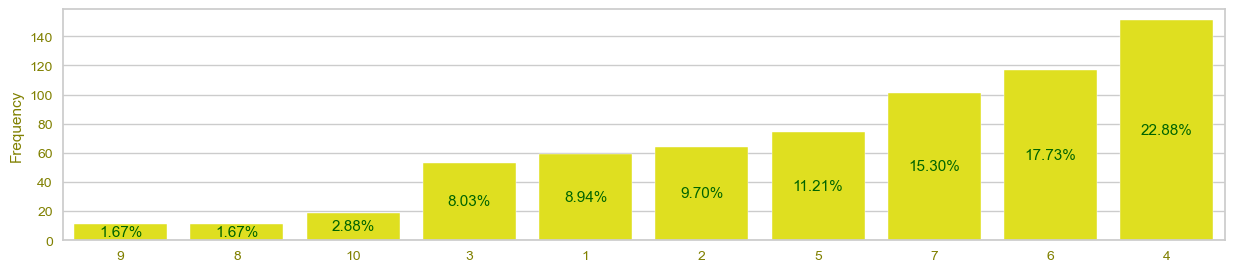

Count Plot: Total_Visits_Bank


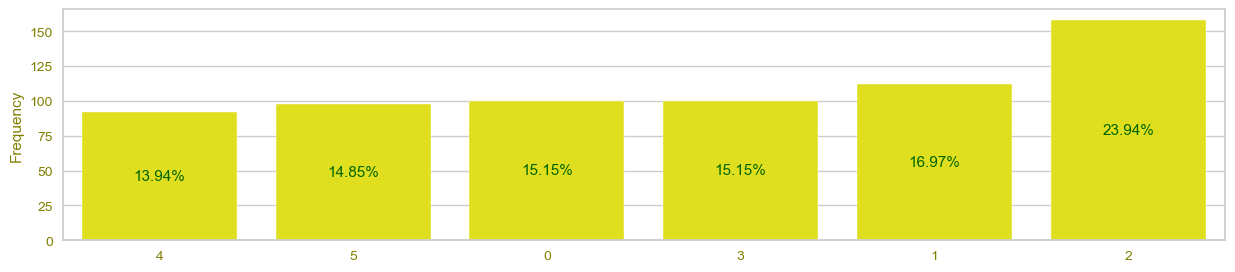

Count Plot: Total_Visits_Online


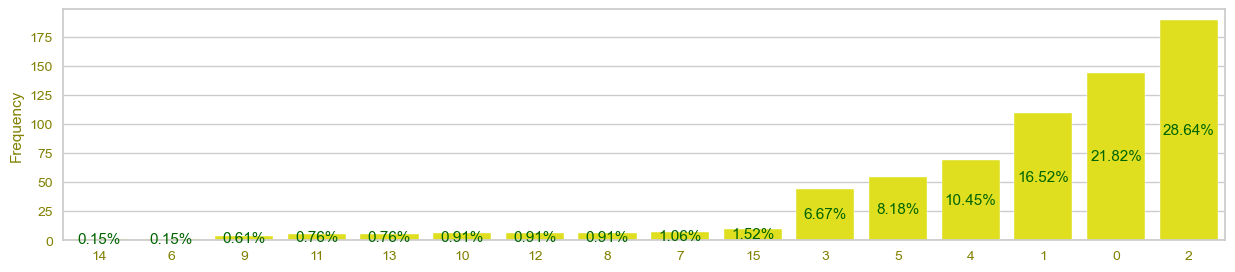

Count Plot: Total_Calls_Made


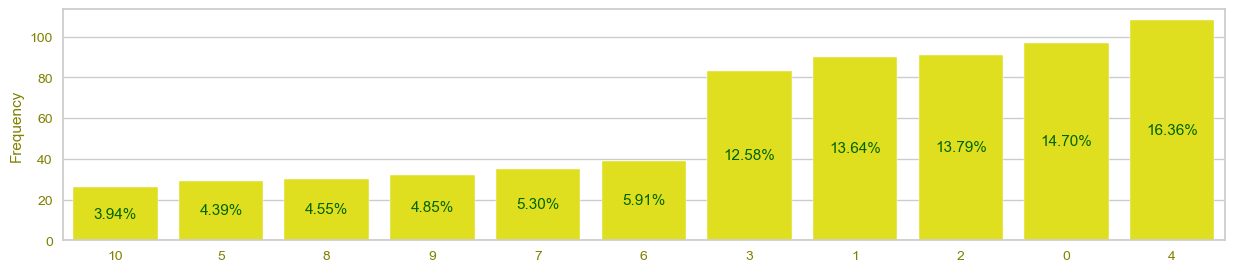

In [18]:
# checking the Distribution of Features with Categorical/Discrete Values.

discrete_list = ['Total_Credit_Cards' , 'Total_Visits_Bank' , 'Total_Visits_Online' , 'Total_Calls_Made'] 

for index, element in enumerate(discrete_list):
    print('\033[1m' , '\033[92m' , 'Count Plot: ' 
          '\033[1m' , '\033[91m' , element , '\033[0m' , '\033[92m' , sep='')

    total = float(len(df))
    plt.figure(figsize=(15 , 3))
    #count = df[element].value_counts()
    #percentage = df[element].value_counts(normalize=True)
    #frame = pd.DataFrame({'Count': count, 'Percentage': percentage})    
   # print(frame)
    
    plot = sns.countplot(data=df , x = element , color = 'yellow', 
                         order=df[element].value_counts(ascending=True).index)

    for p in plot.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height() * 0.5
        plot.annotate(percentage , (x, y) , ha='center' , va='center' , size=11 , color='darkgreen')

    #plot.xticks(rotation = 90)
    plot.set(xlabel=None)
    plot.xaxis.label.set_color('olive')
    plot.tick_params(axis='x', colors='olive')
    plot.set(ylabel='Frequency')
    plot.yaxis.label.set_color('olive')
    plot.tick_params(axis='y', colors='olive')
    plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.1:** All Values in Total_Credit_Cards Column are realistcs and varying between 0 and 10 with no Anomalies.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.2:** 67.12% of Customers have between 4 and 7 Credit Cards.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.3:** 6.22% of Customers have more than 7 Credit Cards.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.1:** All Values in Total_Visits_Bank Column are realistcs and varying between 0 and 5 with no Anomalies.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.2:** Although of convergence distribution of No. of Personal Visits, 15.15% of Customers have never visits the Bank personally.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.1:** All Values in Total_Visits_Online Column are realistcs and varying between 0 and 15 with no Anomalies.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.2:** 70.46% of Customers have made a maximum of 5 Online Visits (At least 1 Online Visit).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.3:** 21.82% of Customers have never logged in into Online Banking Services.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.1:** All Values in Total_Calls_Made Column are realistcs and varying between 0 and 10 with no Anomalies.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.2:** 56.37% of Customers have made a maximum of 4 Calls (At least 1 Call).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.3:** 14.70% of Customers have never called the Bank.

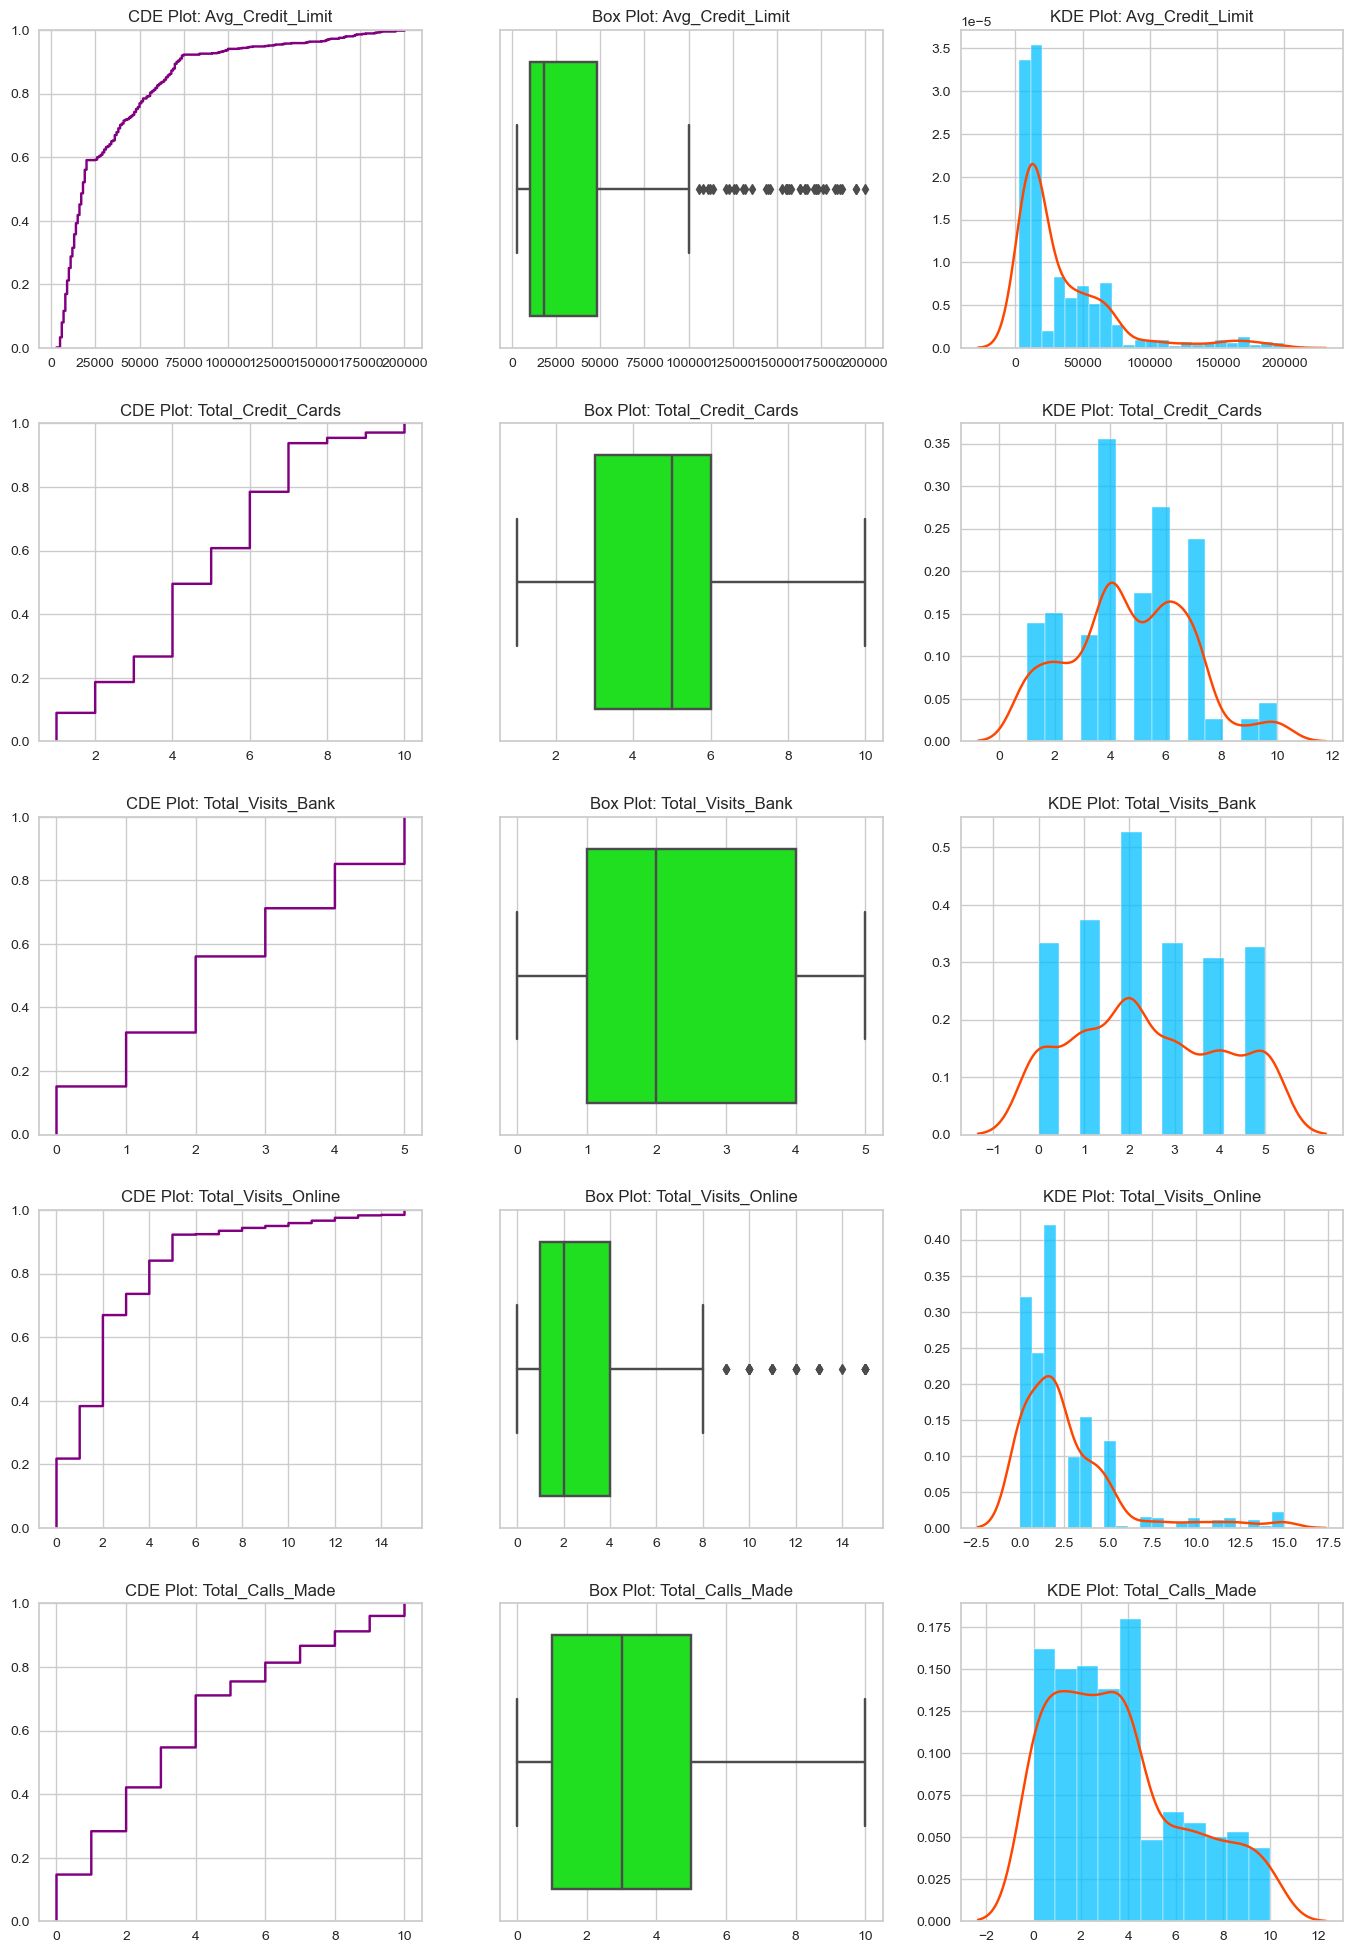

In [19]:
# Checking the Comulative Distribution and Extreme Values of all Numerical Features:

numerics_list = df.select_dtypes(include=np.number).columns.tolist()

height = len(numerics_list) * 4
fig, axis = plt.subplots(len(numerics_list) , 3 , figsize=(14 , height))

i = 0
for element in numerics_list:
    j = 0
    sns.ecdfplot(data=df , x=element , ax=axis[i , j] , color='purple')
    plt.setp(axis[: , 0] , xlabel='')
    plt.setp(axis[: , 0] , ylabel='')
    plt.setp(axis[i : i + 1, 0] , title='CDE Plot: ' + element)

    sns.boxplot(data=df , x=element , ax=axis[i, j + 1] , color='Lime')
    plt.setp(axis[: , 1] , xlabel='')
    plt.setp(axis[: , 1] , ylabel='')
    plt.setp(axis[i : i + 1, 1] , title='Box Plot: ' + element)
    
    sns.histplot(data=df , x=element , ax=axis[i , j + 2] , color='deepskyblue' , stat='density')
    sns.kdeplot(data=df , x=element , ax=axis[i , j + 2] , color='orangered')
    plt.setp(axis[: , 2] , xlabel='')
    plt.setp(axis[: , 2] , ylabel='')
    plt.setp(axis[i : i + 1, 2] , title='KDE Plot: ' + element)
    
    fig.tight_layout(pad=2.0)
    i += 1

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.1:** Around 92% of Customers have a maximum of 75,000 as Average Credit Cards Limit.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1.2:** Extreme Values found to be more than 100,000 of Average Credit Cards Limit.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.1:** Around 50% of Customers have between 3 and 6 Credit Cards.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2.2:** No Extreme Values are found.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.1:** Around 50% of Customers have a maximum of 2 Personal Visits.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3.2:** No Extreme Values are found.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.1:** Around 75% of Customers have a maximum of 4 Online Visits.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4.2:** Extreme Values found to be more than 8 of No. of Online Visits.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.1:** Around 75% of Customers have a maximum of 5 Calls.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5.2:** No Extreme Values are found.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **4. Bivariate Analysis:**  

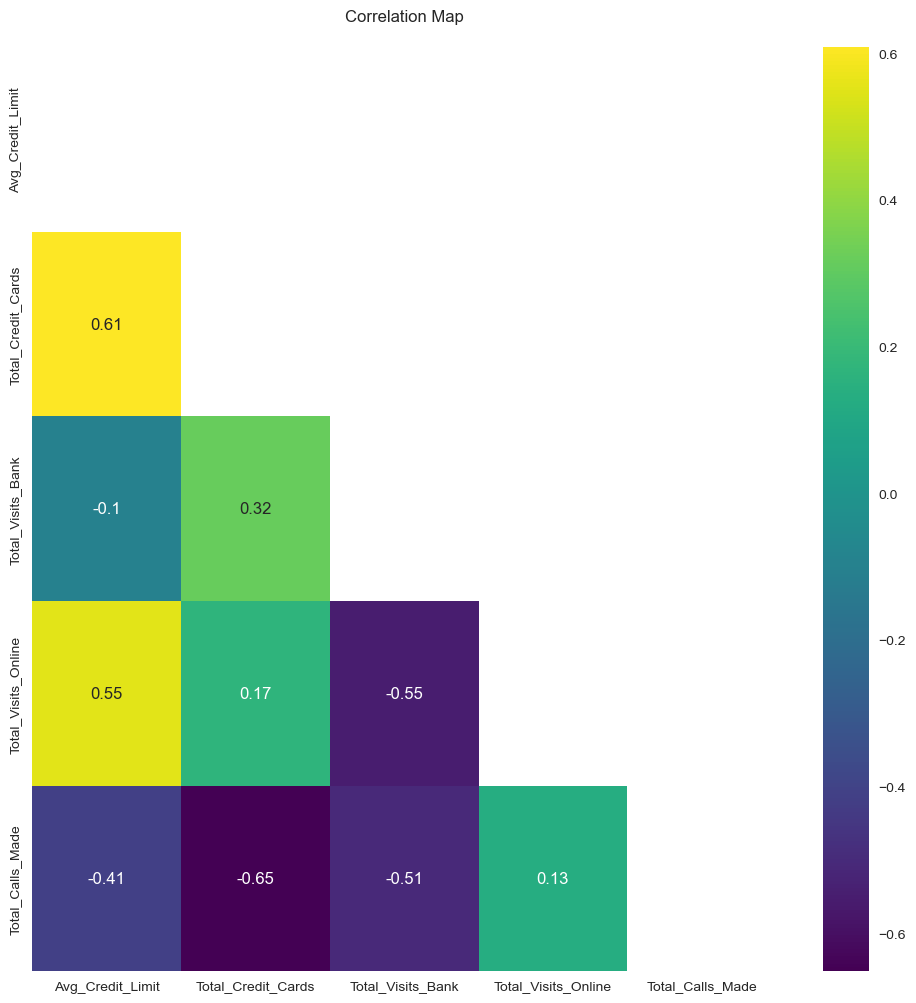

In [20]:
# Plotting a Heatmap to visualize the correlation between Numerical Columns:

plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap="viridis", annot=True, mask=mask)
plt.title('Correlation Map\n');

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Fair Strong Positive Correlation is found between Total_Credit_Cards and Avg_Credit_Limit (+0.61); Such Positive Correlation indicates that Customers with more Credit Cards have higher Limit.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Medium Strong Positive Correlation is found between Total_Visits_Online and Avg_Credit_Limit (+0.55); Such Positive Correlation indicates that Customers with higher Limit of Credit Cards have better trend to use Online Banking Services.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Medium Strong Negative Correlation is found between each of Total_Visits_Online, Total_Calls_Made and Total_Visits_Bank (-0.55 and -0.51 respectively); Such Negative  Correlations indicate that reaching out to Bank via Phone or Online Services replace the need of personal visits.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** Fair Strong Negative Correlation is found between Total_Credit_Cards and Total_Calls_Made (-0.65); Such Negative Correlations is mysterious and could not be interpreted logically.

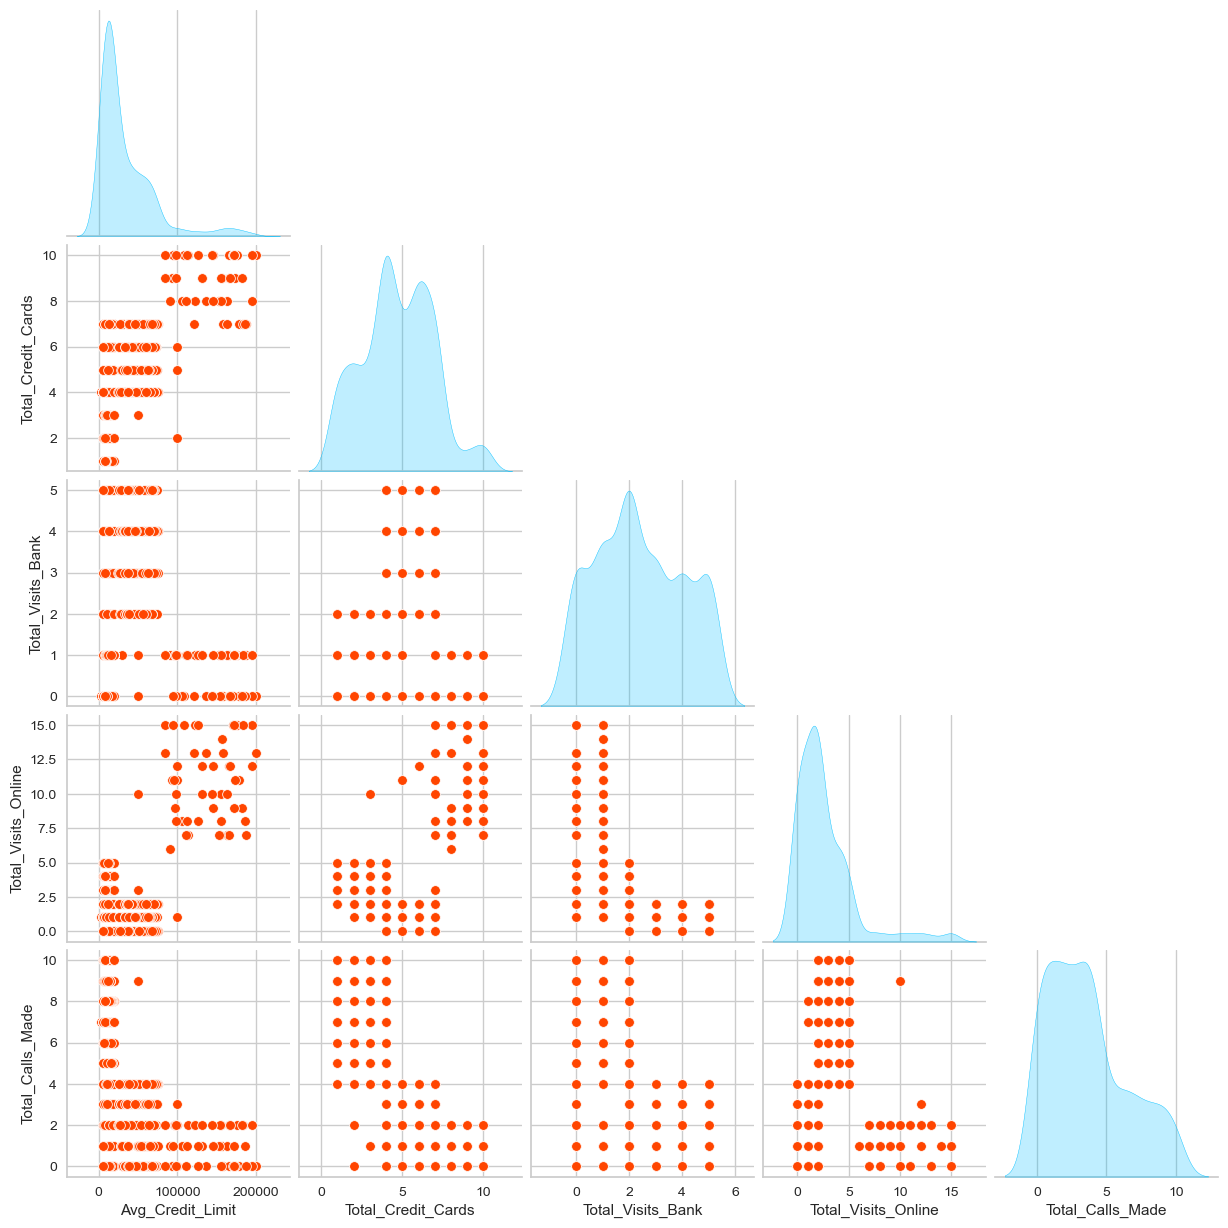

In [21]:
# Discovering the Relation between each Pair of Numerical Features:

sns.pairplot(data=df , vars=numerics_list , diag_kind='kde' , plot_kws={'color' : 'orangered'} , 
             diag_kws={'color' : 'deepskyblue'} , corner=True);

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Correlations are quite visible between some of Numerical Features (Non-Diagonal Plots).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Some Distributions indicate a possible Clustering due to Gaps between pair of Data Points; Such like Total_Visits_Online and Total_Credit_Cards, Total_Calls_Made and Total_Credit_Cards.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Based on the Peaks in Diagonal Plots, we can initially expect 3 or 4 Cluster.

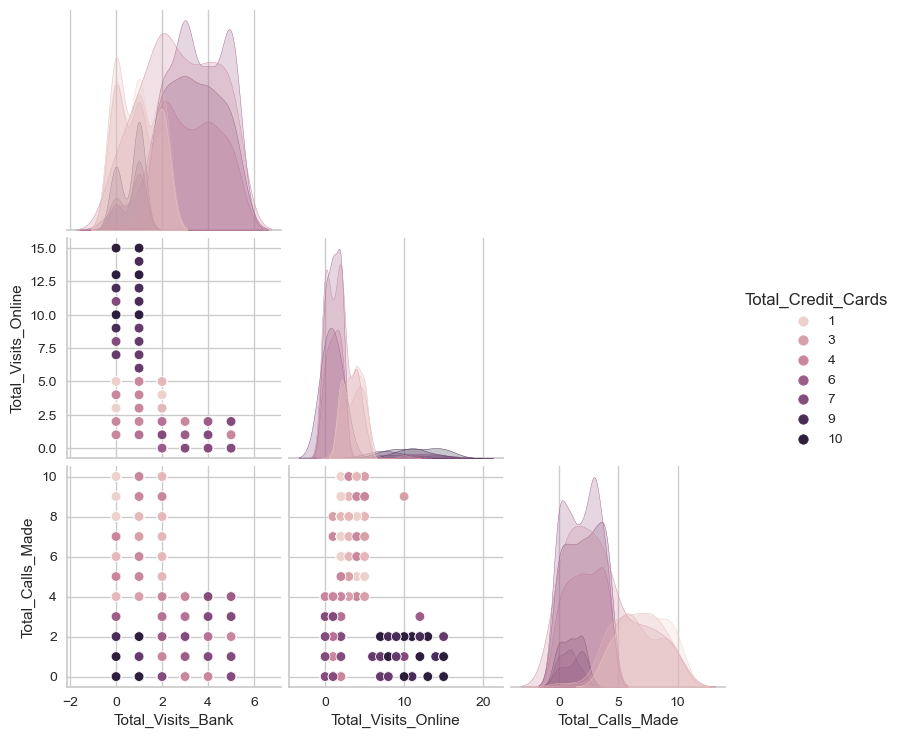

In [22]:
# Discovering the Relation between each Pair of Numerical Features by Grouping them using No. of Credit Cards:

sns.pairplot(data=df.loc[:,df.columns!='Avg_Credit_Limit']  , hue = 'Total_Credit_Cards' , plot_kws={'color' : 'orangered'} , 
             diag_kws={'color' : 'deepskyblue'} , corner=True);

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> Another proof of possible clustering is well noted due to the occurance of groups (Data Points with similar Attributes), Ex.:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Total_Visits_Online and Total Visits_Bank shows 3 Clusters:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Cluster 1: More than 5 Online Visits and less than 2 Personal Visits.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Cluster 2: Less than 5 Online Visits and less than 2 Personal Visits.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Cluster 3: Less than 5 Online Visits and more than 2 Personal Visits.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Total_Calls_Made and Total Visits_Online shows 3 Clusters:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Cluster 1: More than 5 Calls and less than 5 Online Visits.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Cluster 2: Less than 5 Online Visits and less than 5 Online Visits.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Cluster 3: Less than 5 Online Visits and more than 5 Online Visits.

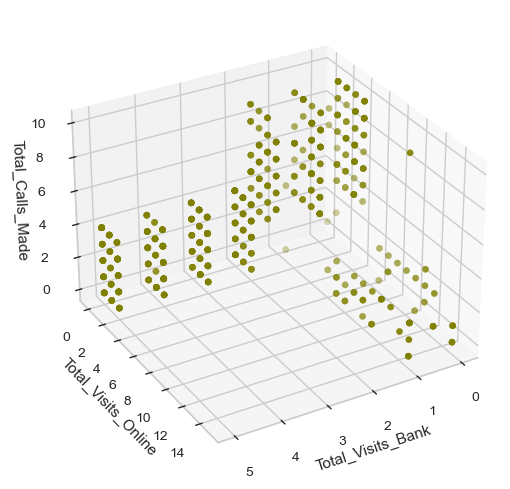

In [23]:
# Discovering the 3d Plot of Customer behaviour in using the Contact Channels:

fig = plt.figure(figsize=(6 , 6))
ax = plt.axes(projection='3d')

x = df['Total_Visits_Bank']
y = df['Total_Visits_Online']
z = df['Total_Calls_Made']

ax.scatter(x , y , z , marker='o' , color='olive')
ax.set_xlabel('Total_Visits_Bank')
ax.set_ylabel('Total_Visits_Online')
ax.set_zlabel('Total_Calls_Made')
ax.view_init(azim=60)
plt.show()

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> Another valid proof of possible clustering is well noted due to the occurrence of group (Data Points with similar Attributes); Such distribution enhance the assumption of possible 3 Groups as follow:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Group 1:** Low Total_Visits_Online, low Total_Visits_Bank, and high Total_Calls_Made.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Group 2:** Low Total_Visits_Online, high Total_Visits_Bank, and low Total_Calls_Made.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Group 3:** High Total_Visits_Online, low Total_Visits_Bank, and low Total_Calls_Made.

In [24]:
# Defining a Function to plot the Continuous Featues:

def scatter_plot(x , y):
    print('\033[1m' , '\033[92m' , 'Scatter Plot (' , 
          '\033[1m' , '\033[91m' , x , 
          '\033[1m' , '\033[92m' , ' vs ', 
          '\033[1m' , '\033[91m' , y , 
          '\033[1m' , '\033[92m' , '):' , sep='')
    plt.figure(figsize=(6, 4))
    plot = sns.regplot(data=df , x=x , y=y , ci=False , color='tomato' , line_kws={"lw":2 , 'linestyle':'--', 'color':'steelblue'})

Scatter Plot (Total_Credit_Cards vs Avg_Credit_Limit):


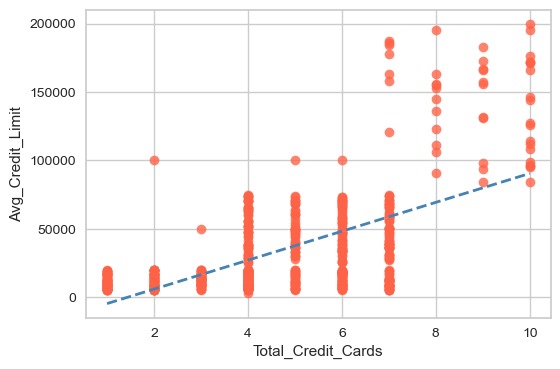

In [25]:
scatter_plot('Total_Credit_Cards' , 'Avg_Credit_Limit')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** It's fair to say that the existing of Extreme Values is quite important and might lead to a separate Cluster in the coming Analysis.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Based on such Plot, 3 possible Clusters might be formed in term of No. of Credit Cards: Low (1-3), Medium (4-6), and High (7-10).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Overall, Customers with more Credit Cards have higher Card Limit which is logical.

Scatter Plot (Total_Credit_Cards vs Total_Calls_Made):


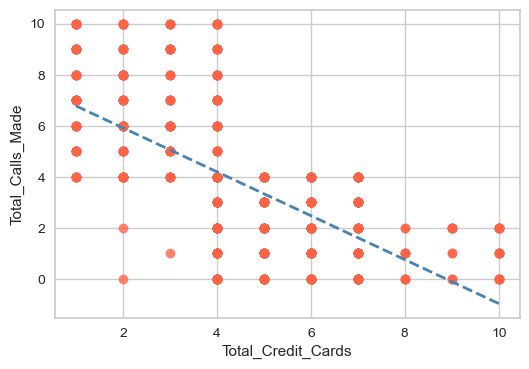

In [26]:
scatter_plot('Total_Credit_Cards' , 'Total_Calls_Made')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Another good indicator that enhance the assumption of 3 Clusters in term of No. of Credit Cards.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** The separation between Customers Behaviour is quite clear, Each range of Credit Cards has a different Range of Calls.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Overall, Customers with more Credit Cards tend to call the Bank less than others.

Scatter Plot (Total_Credit_Cards vs Total_Visits_Bank):


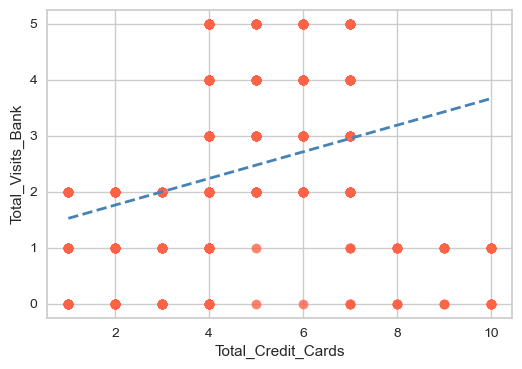

In [27]:
scatter_plot('Total_Credit_Cards' , 'Total_Visits_Bank')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Another good indicator that enhance the assumption of 3 Clusters in term of No. of Credit Cards.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** The separation between Customers Behaviour is quite clear, Each range of Credit Cards has a different Range of Personal Visits.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Overall, Customers whose have between 4 and 7 Credit Cards tend to visit the Bank more than others. On the other hand, Customers whose have more than 7 Credit Cards tend to visit the Bank less than others.

Scatter Plot (Total_Credit_Cards vs Total_Visits_Online):


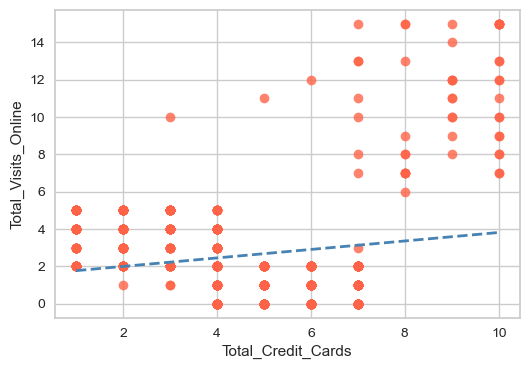

In [28]:
scatter_plot('Total_Credit_Cards' , 'Total_Visits_Online')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Another good indicator that enhance the assumption of 3 Clusters in term of No. of Credit Cards.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** The separation between Customers Behaviour is somehow important, Each range of Credit Cards has a slight different Range of Online Visits.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Overall, Customers whose have between 5 and 6 Credit Cards tend to login into Online Banking Services less than others. On the other hand, Customers whose have more than 6 Credit Cards tend to login more than others.

Scatter Plot (Total_Visits_Bank vs Total_Visits_Online):


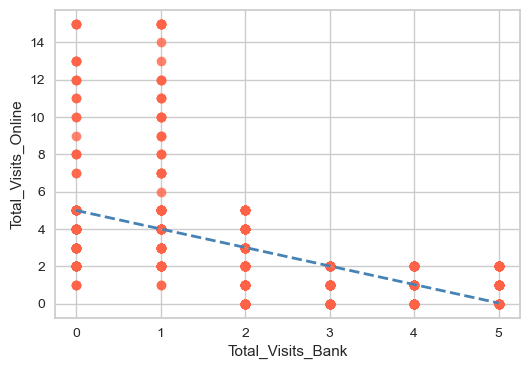

In [29]:
scatter_plot('Total_Visits_Bank' , 'Total_Visits_Online')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** It is very important to note such a phenomenon whereby customers who tend to visit the Bank in person stay away from using the Online Banking Services.

Scatter Plot (Total_Visits_Bank vs Total_Calls_Made):


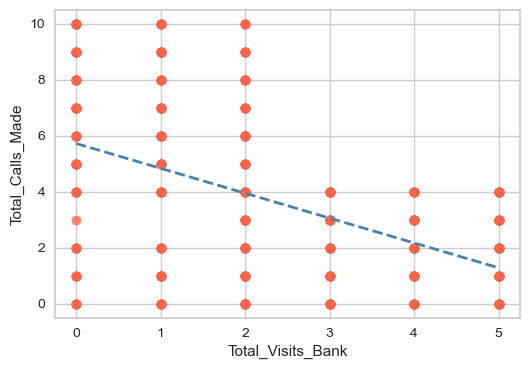

In [30]:
scatter_plot('Total_Visits_Bank' , 'Total_Calls_Made')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Such plot enhance the conclusion that we have two different behaviours; one for those who prefer the Personal Visits, and the other for those who prefer the calls/Online Visits.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** It is fair to say that Customers with few Credit Cards rely on Calls, Customers with average number of Credit Cards rely on In-Person Visits, and Customers with high number of Credit Cards rely on Online Visits.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Based on the above analysis, the hypothesis of 3 Groups/Clusters in terms of the No. of Credit Cards is strongly weighted due to the direct effect of the No. of Credit Cards on customer's behaviour.

<left> <font size=5 style='font-family:Courier New' color='Blue'> **Insights (Exploratory Data Analysis):**
<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **Avg_Credit_Limit:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1:** Average of Credit Limit is varying between 3,000 and 200,000 with an Average of 34,574.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2:** Around 92% of Customers have a maximum of 75,000 as an Average of Credit Limit.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3:** Positive Correlation is found between the Average Credit Limit and Total No. of Credit Cards hold by a Customer.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **Total_Credit_Cards:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1:** No. of Credit Cards hold by Customers is varying between 1 and 10 with an Average of 5 (Rounded Up).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2:** Around 67% of Customers have between 4 and 7 Credit Cards.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3:** Only 6.22% of Customers have more than 7 Credit Cards (8 and above).

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **Total_Visits_Bank:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1:** No. of In-Person Visits by made by Customers is varying between 1 and 5 with an Average of 2 (Rounded Down).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2:** Although of the convergence distribution of No. of In-Person Visits, 15.15% of Customers have never visited the Bank.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3:** Customers who have between 4 and 7 Credit Cards tend to visit the Bank more than others; Such behaviour is dramatically decrease when Customers have more than 7 Credit Cards.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **Total_Visits_Online:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1:** No. of Online Visits made by Customers is varying between 0 and 15 with an Average of 3 (Rounded Up).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2:** Around 70% of Customers have made between 1 and 5 logins into Online Banking Services.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3:** Around 22% of Customers have never logged in into Online Banking Services.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4:** Customers whose have between 7 and 10 Credit Cards tend to login into Online Banking Services more than others; Such behaviour is dramatically decrease when Customers have either 5 or 6 Credit Cards.

<br> <left> <font size=4 style='font-family:Courier New' color='Grey'> **Total_Calls_Made:**
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **1:** No. of Calls made by Customers is varying between 0 and 10 with an Average of 4 (Rounded Up)
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **2:** Around 56% of Customers have made between 1 and 4 Calls.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **3:** Around 15% of Customers have never called the Bank.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **4:** Customers whose have between 17 and 4 Credit Cards tend to call the Bank more than others; Such behaviour is dramatically decrease as the No. of Credit Cards increase.


<br> <left> <font size=4 style='font-family:Courier New' color='Blue'> Overall, We can divide the Customers - Approximately - into 3 Categories/Groups/Segments in terms of the No. of Credit Cards: Low (Between 1 and 3), Medium (Between 4 and 7), and High (Between 7 and 10).
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **-** Credit Limit increases as the No. of Credit Cards increases.
<br> <left> <font size=4 style='font-family:Courier New' color='Black'> **-** Low Segment prefers to contact the Bank via Calls, Medium Segment prefers the In-Person Visits, while the High Segment prefers the Online Banking Services.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **5. Data Pre-Processing:**

In [31]:
'''
Applying the Concept of Empirical Rule to find the Outliers:
Empirical Rule: 99.7% of the Data Points falls within 3 St. Deviations from the Mean.
'''

for element in  numerics_list:
    outliers_list = []
    
    mean = np.mean(df[element])
    st_deviation = np.std(df[element])
    
    for value in df[element]:
        z_score = (value - mean) / st_deviation
        if z_score > 3:
            outliers_list.append(value)
            
    outliers_list.sort()
    outliers_count = len(outliers_list)
    outliers_perc = len(outliers_list) / df[element].shape[0]
    
    print('\033[0m' , '\033[92m' , '\n' , 'Column: ' , 
          '\033[0m' , '\033[91m' , element , sep='')
    
    print('\033[0m' , '\033[92m' , 'No. of Outliers: ' , 
          '\033[0m' , '\033[91m' , outliers_count , sep='')
            
    if outliers_count > 0:
        print('\033[0m' , '\033[92m' , 'Percentage of Outliers: ' , 
              '\033[0m' , '\033[91m' , '{0:.2%}'.format(outliers_perc) , sep='')
        
        print('\033[0m' , '\033[92m' , 'Outliers Values: ' , 
              '\033[0m' , '\033[91m' , outliers_list , sep='')


Column: Avg_Credit_Limit
No. of Outliers: 24
Percentage of Outliers: 3.64%
Outliers Values: [153000, 155000, 156000, 156000, 157000, 158000, 163000, 163000, 166000, 166000, 167000, 171000, 172000, 172000, 173000, 176000, 178000, 183000, 184000, 186000, 187000, 195000, 195000, 200000]

Column: Total_Credit_Cards
No. of Outliers: 0

Column: Total_Visits_Bank
No. of Outliers: 0

Column: Total_Visits_Online
No. of Outliers: 22
Percentage of Outliers: 3.33%
Outliers Values: [12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

Column: Total_Calls_Made
No. of Outliers: 0


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** 2 Columns have Extreme Values that falls beyond 3 Standard Deviations from the Mean.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Although only 0.03% of Data Points might fall beyond the 3 Standard Deviations according to Empirical Rule, 3.64% and 3.33% of Data Points have been found to exceed such limit.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** It's important to note the continuity in Data Points that exceed the 3 Standard Deviations, such continuity indicates an actual possible occurrences of such Values in the real world.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** Furthermore, the Extreme Values have shown an important role in grouping the Customers as observed in the previous plots. Also, Avg_Credit_Limit is correlated  positivelty with Total_Credit_Cards making it normal to occur, and it's quite normal for a customer to login 15 times or even more!
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5:** Hence, we will neither drop these Values nor impute them.

In [32]:
# Scaling the Numerical Features to to neutralize the effect of High Magnitude Values in Avg_Credit_Limit Column:

scaler = StandardScaler()
subset = df[numerics_list].copy()
subset_scaled = scaler.fit_transform(subset)
subset_scaled_df = pd.DataFrame(subset_scaled , columns=subset.columns)   

In [33]:
# Ensuring that everything is working as expected after Normalization by displaying the first 5 Data Rows:

subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [34]:
# Verifying the success of Standardization Process by calculating the Mean/St. Deviation of Numerical Features:

for element in subset_scaled_df.columns:
    mean = np.mean(subset_scaled_df[element])
    st_deviation = np.std(subset_scaled_df[element])
    
    print('\033[0m' , '\033[92m' , 'Column: ' ,
          '\033[0m' , '\033[91m' ,  element ,
          '\033[0m' , '\033[92m' , ' \t Mean = ' , 
          '\033[0m' , '\033[91m' , mean , 
          '\033[0m' , '\033[92m' , ' \t St. Deviation = ' , 
          '\033[0m' , '\033[91m' , st_deviation , sep='')

Column: Avg_Credit_Limit 	 Mean = 8.195464509051156e-16 	 St. Deviation = 1.0000000000000002
Column: Total_Credit_Cards 	 Mean = -4.006222962798898e-15 	 St. Deviation = 1.0000000000000013
Column: Total_Visits_Bank 	 Mean = 1.15732339536683e-16 	 St. Deviation = 1.0000000000000004
Column: Total_Visits_Online 	 Mean = 1.9445724491919408e-16 	 St. Deviation = 0.9999999999999998
Column: Total_Calls_Made 	 Mean = -7.11215598199267e-16 	 St. Deviation = 0.9999999999999993


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Standardization Process has succeeded in scaling each of the Numerical Features to have a 0 Mean and 1 St. Deviation (Approximately).

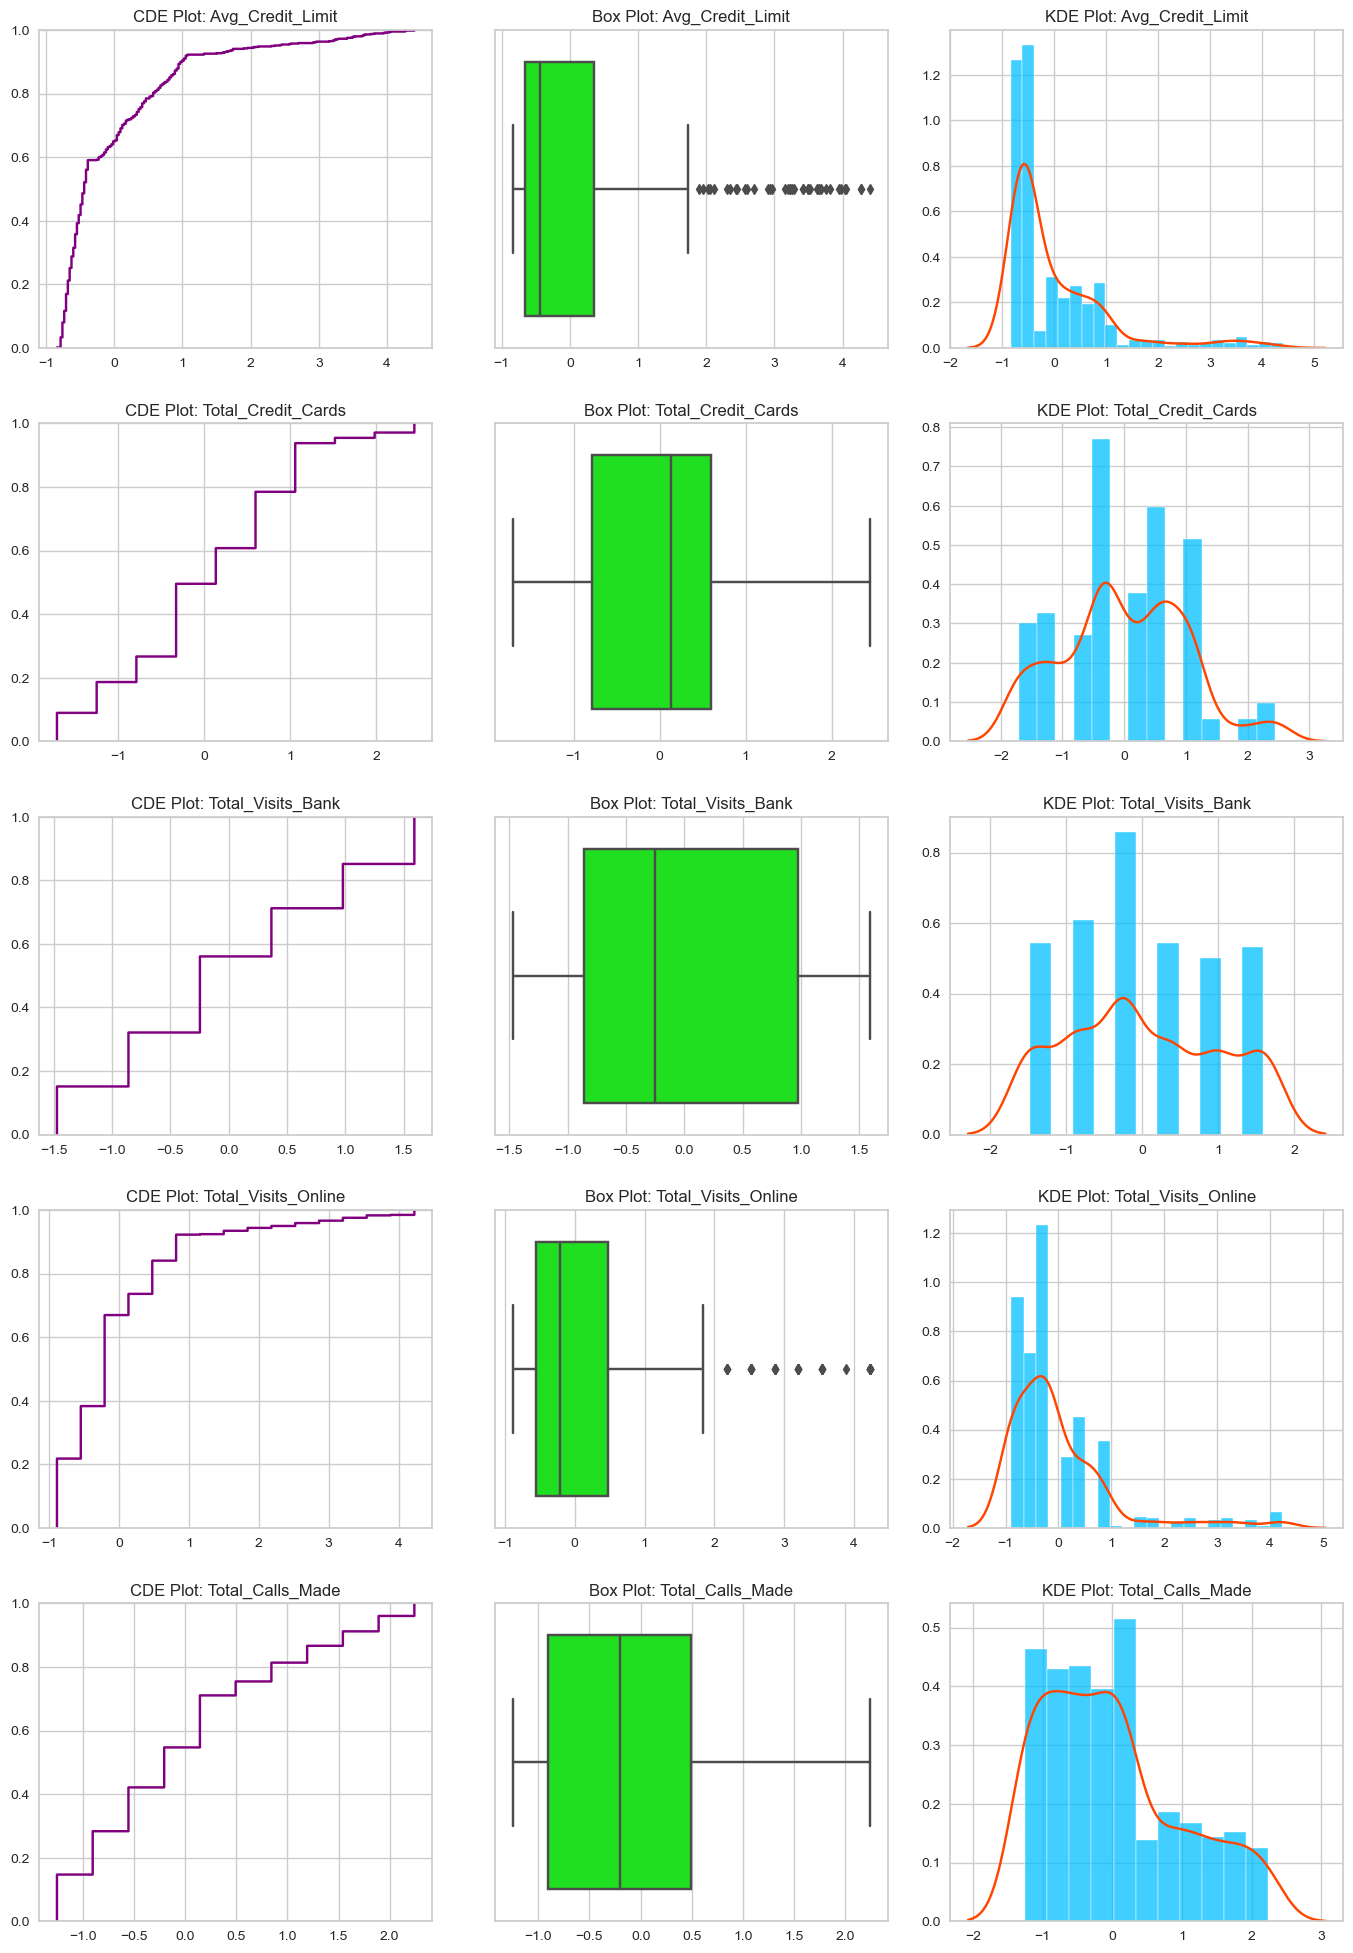

In [35]:
# Re-Checking the Comulative Distribution and Extreme Values of all Numerical Features after Standarization:

numerics_list_scaled = subset_scaled_df.select_dtypes(include=np.number).columns.tolist()

height = len(numerics_list_scaled) * 4
fig, axis = plt.subplots(len(numerics_list_scaled) , 3 , figsize=(14 , height))

i = 0
for element in numerics_list_scaled:
    j = 0
    sns.ecdfplot(data=subset_scaled_df , x=element , ax=axis[i , j] , color='purple')
    plt.setp(axis[: , 0] , xlabel='')
    plt.setp(axis[: , 0] , ylabel='')
    plt.setp(axis[i : i + 1, 0] , title='CDE Plot: ' + element)

    sns.boxplot(data=subset_scaled_df , x=element , ax=axis[i, j + 1] , color='Lime')
    plt.setp(axis[: , 1] , xlabel='')
    plt.setp(axis[: , 1] , ylabel='')
    plt.setp(axis[i : i + 1, 1] , title='Box Plot: ' + element)
    
    sns.histplot(data=subset_scaled_df , x=element , ax=axis[i , j + 2] , color='deepskyblue' , stat='density')
    sns.kdeplot(data=subset_scaled_df , x=element , ax=axis[i , j + 2] , color='orangered')
    plt.setp(axis[: , 2] , xlabel='')
    plt.setp(axis[: , 2] , ylabel='')
    plt.setp(axis[i : i + 1, 2] , title='KDE Plot: ' + element)
    
    fig.tight_layout(pad=2.0)
    i += 1

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Since no Missing Values Imputation, No Duplicates, and No Outliers Treatment, the same distribution has been maintained except of scaling the Features.

<left> <font size=6 style='font-family:Courier New' color='Orange' > **6. Models Building:**
   
<br> <left> <font size=5 style='font-family:Courier New' color='Blue'> **K-means Clustering:**

In [36]:
# Craeting copy of Original Data Frame (kc: KMeans Clustering):

df_kc = df.copy()

In [37]:
# Ensuring that everything is working as expected:

df_kc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [38]:
# Craeting copy of Scaled Data Frame:

subset_scaled_df_kc = subset_scaled_df.copy()

In [39]:
# Ensuring that everything is working as expected:

subset_scaled_df_kc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


  File "C:\Users\ayssa\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


No. of Clusters: 1	Average Distortion: 2.006922
No. of Clusters: 2	Average Distortion: 1.457155
No. of Clusters: 3	Average Distortion: 1.146628
No. of Clusters: 4	Average Distortion: 1.046383
No. of Clusters: 5	Average Distortion: 0.990779
No. of Clusters: 6	Average Distortion: 0.942901
No. of Clusters: 7	Average Distortion: 0.909470
No. of Clusters: 8	Average Distortion: 0.893154
No. of Clusters: 9	Average Distortion: 0.861403
No. of Clusters: 10	Average Distortion: 0.837875
No. of Clusters: 11	Average Distortion: 0.821599


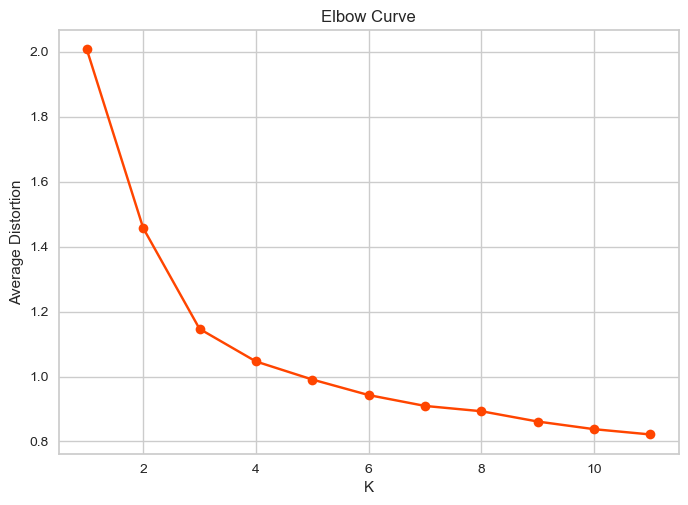

In [40]:
# Plotting the Elbow Curve (K vs Average Distortion):

clusters = range(1 , 12)
meanDistortions=[]

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df_kc)
    prediction = model.predict(subset_scaled_df_kc)
    distortion = (sum(np.min(cdist(subset_scaled_df_kc , model.cluster_centers_ , 
                             'euclidean') , axis=1)) / subset_scaled_df_kc.shape[0])

    meanDistortions.append(distortion)
    print('\033[0m' , '\033[92m' , 'No. of Clusters: ' , 
          '\033[0m' , '\033[91m' , k ,  
          '\033[0m' , '\033[92m' , '\tAverage Distortion: ' , 
          '\033[0m' , '\033[91m' , '{:.6f}'.format(distortion) , sep='')
        
plt.plot(clusters , meanDistortions , color='orangered' , marker='o')
plt.xlabel('K')
plt.ylabel('Average Distortion')
plt.title('Elbow Curve')
plt.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** An Elbow is well noted at K = 3.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Elbow Curve starts to flatten at K = 4 with no significant changes.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Logically, increasing the No. of Clusters will result in decreasing of WCSS because smaller No. of Data Points will make them closer to each other.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** Furthermore, Increasing the K will decrease the No. of Data Points inside Clusters (Decrease the Cluster Variance) which eventually leads to a decrease in WCSS due to smaller distances.

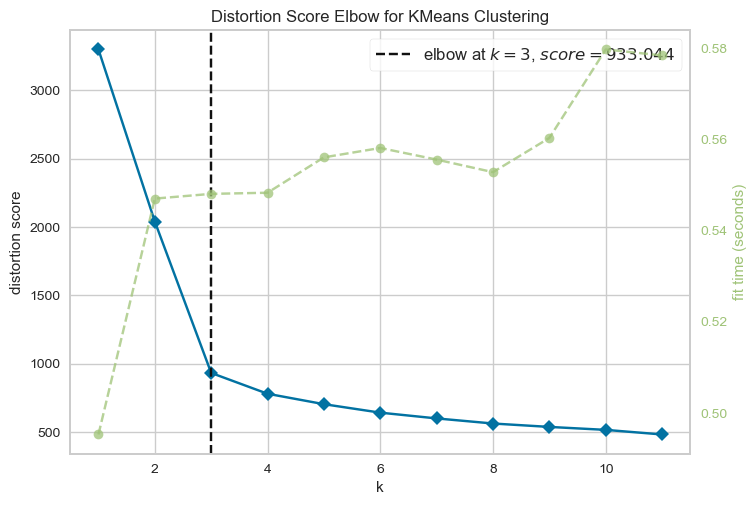

In [41]:
# Plotting the Distortion Score Elbow for KMeans Clustering:

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1 , 12), timings=True)
visualizer.fit(subset_scaled_df_kc)
visualizer.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Again, K = 3 seems to be the Optimal Value of No. of Clusters.   

No. of Clusters: 2	Silhouette Score: 0.418425
No. of Clusters: 3	Silhouette Score: 0.515718
No. of Clusters: 4	Silhouette Score: 0.355667
No. of Clusters: 5	Silhouette Score: 0.271747
No. of Clusters: 6	Silhouette Score: 0.255450
No. of Clusters: 7	Silhouette Score: 0.247955
No. of Clusters: 8	Silhouette Score: 0.240474
No. of Clusters: 9	Silhouette Score: 0.218067
No. of Clusters: 10	Silhouette Score: 0.209849
No. of Clusters: 11	Silhouette Score: 0.210685


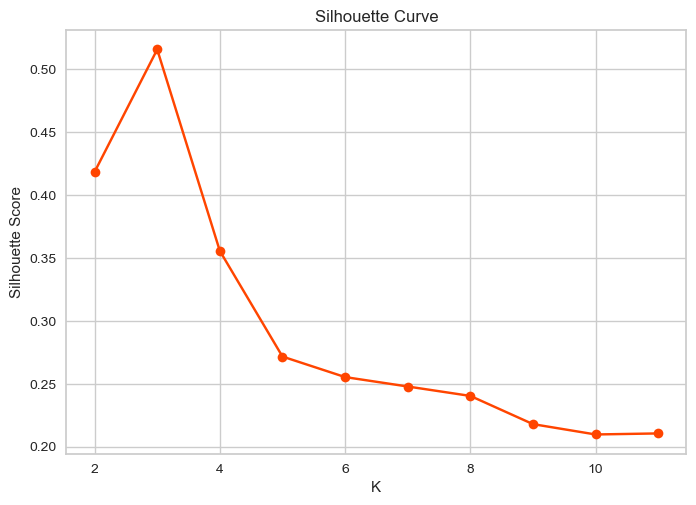

In [42]:
# Plotting the Silhouette Curve (K vs Silhouette Score):

sil_score = []
cluster_list = list(range(2 , 12))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df_kc))
    score = silhouette_score(subset_scaled_df_kc, preds)

    sil_score.append(score)
    print('\033[0m' , '\033[92m' , 'No. of Clusters: ' , 
          '\033[0m' , '\033[91m' , n_clusters ,  
          '\033[0m' , '\033[92m' , '\tSilhouette Score: ' , 
          '\033[0m' , '\033[91m' , '{:.6f}'.format(score) , sep='')
    
plt.plot(cluster_list , sil_score , color='orangered' , marker='o')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Curve')
plt.show()

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** The highest Silhouette Score is at K = 3.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Another peak of Silhouette Score is noted at K = 7 (Will be investigated).    

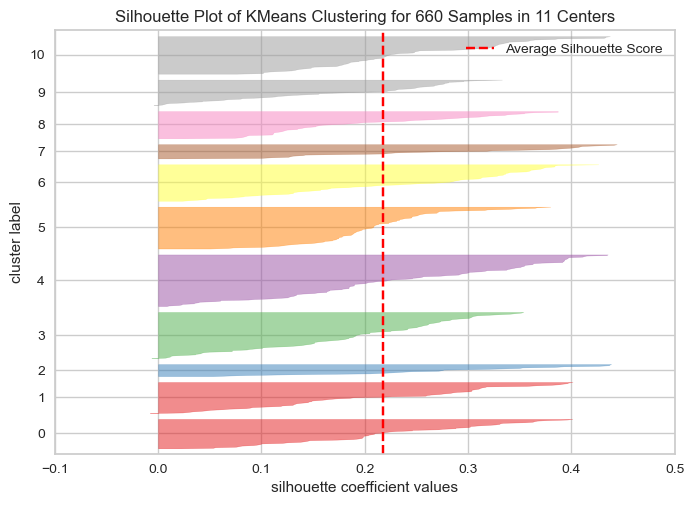

In [43]:
# Visualizing the Clusters with Silhouette Coefficients using 11 Clusters (Clusters vs Silhouette Coefficient):

visualizer = SilhouetteVisualizer(KMeans(11 , random_state=1))
visualizer.fit(subset_scaled_df_kc)
visualizer.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** K = 11 cannot be considered as an Optimal Value due to:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Clusters 2, 3, 5, 8, and 10 have Negative Values of Silhouette Coefficient.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Both Clusters 0 and 8 have approximate similar and small No. of Data Points comparing with other Clusters (No Homogeneity).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Silhouette Coefficient is quite small (0.209266) comparing with other Coefficients using different values of K.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Furthermore, no Elbow has occurred in Elbow Curve using such value of K.

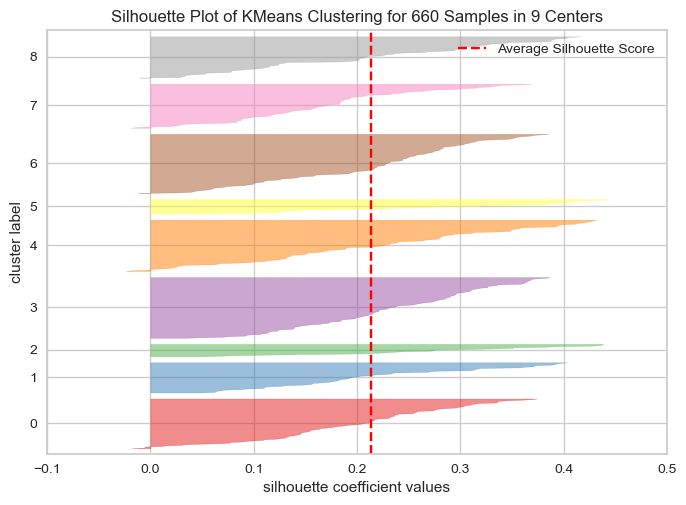

In [44]:
# Visualizing the Clusters with Silhouette Coefficients using 9 Clusters (Clusters vs Silhouette Coefficient):

visualizer = SilhouetteVisualizer(KMeans(9 , random_state=1))
visualizer.fit(subset_scaled_df_kc)
visualizer.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** K = 9 cannot be considered as an Optimal Value due to:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Clusters 3, 5, and 6 have Negative Values of Silhouette Coefficient.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Both Clusters 3 and 7 have approximate similar and small No. of Data Points comparing with other Clusters (No Homogeneity).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Silhouette Coefficient is quite small (0.218742) comparing with other Coefficients using different values of K.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Furthermore, no Elbow has occurred in Elbow Curve using such value of K.

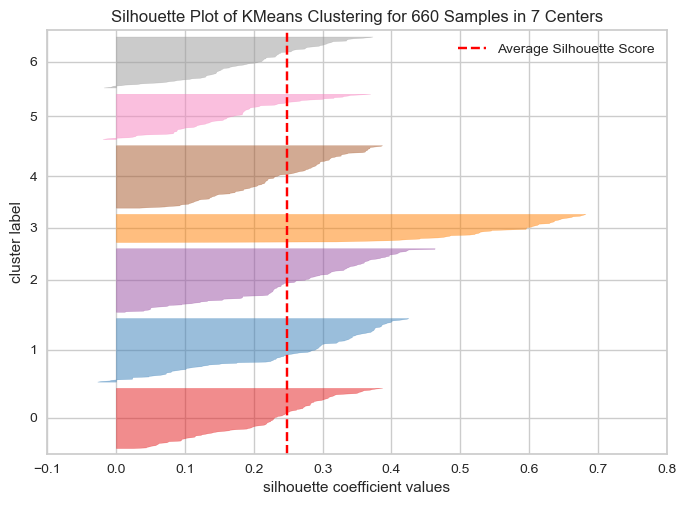

In [45]:
# Visualizing the Clusters with Silhouette Coefficients using 7 Clusters (Clusters vs Silhouette Coefficient):

visualizer = SilhouetteVisualizer(KMeans(7 , random_state=1))
visualizer.fit(subset_scaled_df_kc)
visualizer.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** K = 7 cannot be considered as an Optimal Value due to:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Clusters 0, 3, and 5 have Negative Values of Silhouette Coefficient.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Silhouette Coefficient is quite small (0.248463) comparing with other Coefficients using different values of K.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Furthermore, no Elbow has occurred in Elbow Curve using such value of K.

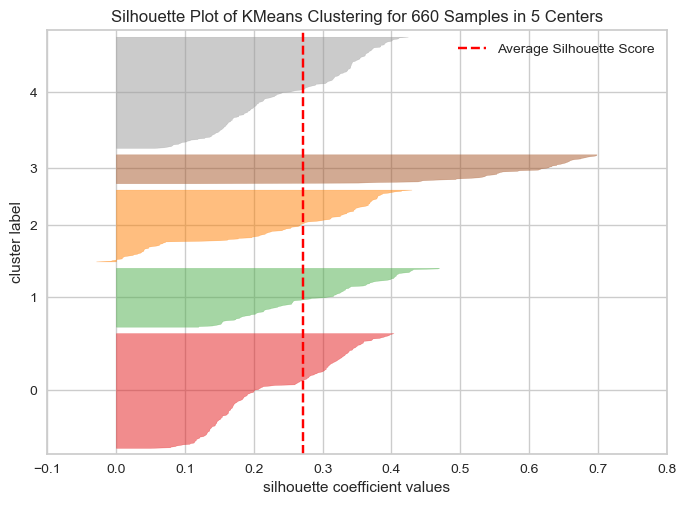

In [46]:
# Visualizing the Clusters with Silhouette Coefficients using 5 Clusters (Clusters vs Silhouette Coefficient):

visualizer = SilhouetteVisualizer(KMeans(5 , random_state=1))
visualizer.fit(subset_scaled_df_kc)
visualizer.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** K = 5 cannot be considered as an Optimal Value due to:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Cluster 3 has Negative Values of Silhouette Coefficient.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Silhouette Coefficient is quite small (0.272391) comparing with other Coefficients using different values of K.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Furthermore, no Elbow has occurred in Elbow Curve using such value of K.

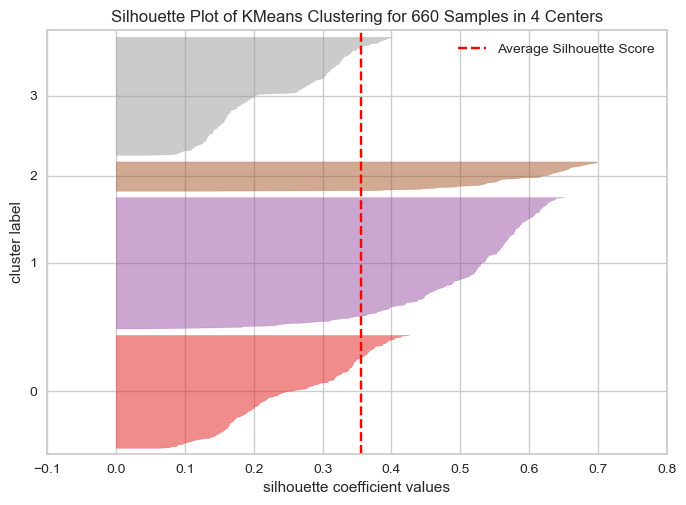

In [47]:
# Visualizing the Clusters with Silhouette Coefficients using 4 Clusters (Clusters vs Silhouette Coefficient):

visualizer = SilhouetteVisualizer(KMeans(4 , random_state=1))
visualizer.fit(subset_scaled_df_kc)
visualizer.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** K = 4 looks like a possible Optimal Value due to:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** No Negative Values of Silhouette Coefficient.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Silhouette Coefficient is somehow large (0.355667) comparing with other Coefficients using different values of K.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Although no Elbow has occurred in Elbow Curve using such value of K, we will keep it as a good candidate.

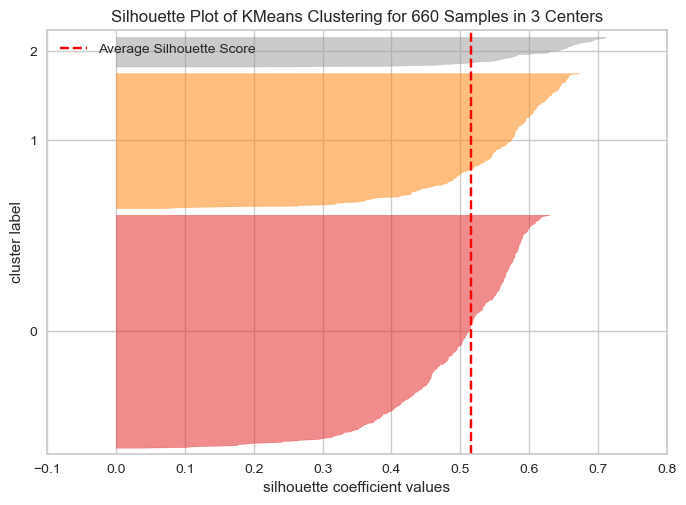

In [48]:
# Visualizing the Clusters with Silhouette Coefficients using 3 Clusters (Clusters vs Silhouette Coefficient):

visualizer = SilhouetteVisualizer(KMeans(3 , random_state=1))
visualizer.fit(subset_scaled_df_kc)
visualizer.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** K = 3 looks like a possible Optimal Value due to:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** No Negative Values of Silhouette Coefficient.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Silhouette Coefficient is the largest (0.515718) comparing with other Coefficients using different values of K.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** An Elbow has occurred in Elbow Curve using such value of K, we will keep it as a good candidate.

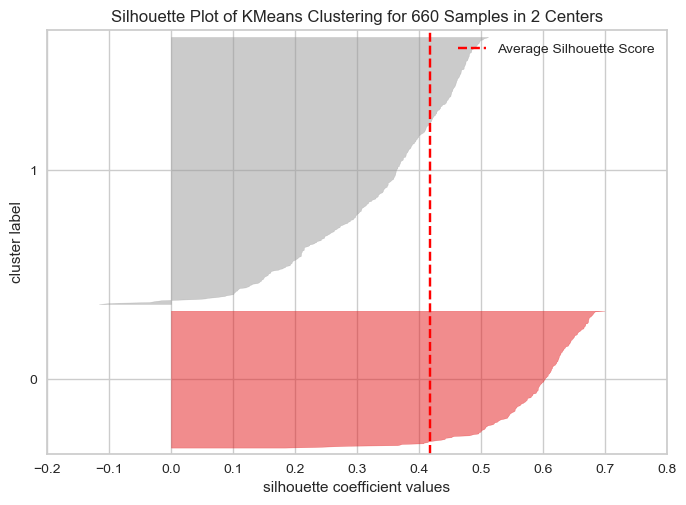

In [49]:
# Visualizing the Clusters with Silhouette Coefficients using 3 Clusters (Clusters vs Silhouette Coefficient):

visualizer = SilhouetteVisualizer(KMeans(2 , random_state=1))
visualizer.fit(subset_scaled_df_kc)
visualizer.show();

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** K = 2 cannot be considered as an Optimal Value due to:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Cluster 0 has Negative Values of Silhouette Coefficient.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Choosing such Value of K makes the model simple and suffer from Under-Fitting.

<left> <font size=5 style='font-family:Courier New' color='Blue'> **Conclusion:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Both K = 3 and K = 4 represent the best candidates for the Optimal No. of Clusters.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** By comparing the formed clusters shape in both cases, we found that:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Cluster 0 remains the same in both.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Cluster 1 and 3 (K = 4) have been merged to form a single Cluster 1 (K = 3).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Cluster 2 (K = 4) remains the same but shifted to Cluster 2 (K = 3).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** It's quite Noted that while Clusters 0 and 2 (K = 4) have distinct attributes, both Clusters 1 and 3 can be merged due to some common attributes (K = 3).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** Using K = 4 will result in 2 Clusters (1 and 3) with similar Averages in most of Attributes which will lead to Bad Clustering and deficiency in forming distinguished Clusters.
    
<br> <left> <font size=3 style='font-family:Courier New' color='Blue'> **Optimal K (KMeans Clustering):**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **K = 3 will be chosen as the Optimal No. of Clusters due to:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** The best Elbow is found at K = 3, adding more cluster doesn't give much better modeling of the data.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** High Silhouette Score is also found at K = 3 where the Clusters have different Variance.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Previous Exploratory Data Analysis shows a strong evidence where most of Customer attributes tend to be distributed into 3 distinct groups/segments.

In [50]:
# Creating the Kmeans Model with the Optimal Value of K:
start_time = time.time()

model_kc = KMeans(n_clusters=3 , random_state=1)
model_kc.fit(subset_scaled_df_kc)
print(model_kc)

end_time = time.time()
elapsed_time = end_time - start_time
print('\033[94m' , '\n Execution Time = ', '{:.5f}'.format(elapsed_time), ' Seconds!' , sep='')

KMeans(n_clusters=3, random_state=1)

 Execution Time = 0.49833 Seconds!


In [51]:
# Adding new Column to label the Cluster for each Data Row in both Original and Scaled Data Frames:

df_kc['Cluster_Label'] = model_kc.labels_
subset_scaled_df_kc['Cluster_Label'] = model_kc.labels_

In [52]:
# Dispaying the Cluster Lables in Original Data Frames:

df_kc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Cluster_Label
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


<br> <left> <font size=5 style='font-family:Courier New' color='Blue'> **Hierarchical Clustering:**

In [53]:
# Craeting copy of Original Data Frame (hc: Hierarchical Clustering):

df_hc = df.copy()

In [54]:
# Ensuring that everything is working as expected:

df_hc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [55]:
# Craeting copy of Scaled Data Frame:

subset_scaled_df_hc = subset_scaled_df.copy()


In [56]:
# Ensuring that everything is working as expected:

subset_scaled_df_hc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [57]:
# Finding the Cophenetic Correlation Coefficient c (Using different Distance Metrics and different Linkage Methods):

distance_metrics = ['euclidean' , 'minkowski' , 'chebyshev' , 'mahalanobis' , 'cityblock' , 'jaccard']
linkage_methods = ['single' , 'complete' , 'average' , 'weighted']

high_cophenet_corr = 0
high_dm_lm = [0, 0]

print('\033[1m' , '\033[92m' , 'All Combinations:' , sep='')

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df_hc , metric=dm , method=lm)
        c , coph_dists = cophenet(Z , pdist(subset_scaled_df_hc))
        print('\033[0m' , '\033[92m' , '- Cophenetic Correlation = ' , 
              '\033[0m' , '\033[91m' , '{:.6f}'.format(c) ,  
              '\033[0m' , '\033[94m' , '\t' , dm.capitalize() , ' Distance - '  , 
              lm.capitalize() ,  ' Linkage' , sep='')
        
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

print('\033[1m' , '\033[92m' , '\n' , 'Best Combination:' , sep='')
print('\033[0m' , '\033[92m' , '- Cophenetic Correlation = ' , 
      '\033[0m' , '\033[91m' , '{:.6f}'.format(high_cophenet_corr) ,  
      '\033[0m' , '\033[94m' , '\t' , high_dm_lm[0].capitalize() , ' Distance - '  , high_dm_lm[1].capitalize() ,  ' Linkage' , sep='')

All Combinations:
- Cophenetic Correlation = 0.739122	Euclidean Distance - Single Linkage
- Cophenetic Correlation = 0.859973	Euclidean Distance - Complete Linkage
- Cophenetic Correlation = 0.897708	Euclidean Distance - Average Linkage
- Cophenetic Correlation = 0.886175	Euclidean Distance - Weighted Linkage
- Cophenetic Correlation = 0.739122	Minkowski Distance - Single Linkage
- Cophenetic Correlation = 0.859973	Minkowski Distance - Complete Linkage
- Cophenetic Correlation = 0.897708	Minkowski Distance - Average Linkage
- Cophenetic Correlation = 0.886175	Minkowski Distance - Weighted Linkage
- Cophenetic Correlation = 0.738235	Chebyshev Distance - Single Linkage
- Cophenetic Correlation = 0.853347	Chebyshev Distance - Complete Linkage
- Cophenetic Correlation = 0.897416	Chebyshev Distance - Average Linkage
- Cophenetic Correlation = 0.891362	Chebyshev Distance - Weighted Linkage
- Cophenetic Correlation = 0.705806	Mahalanobis Distance - Single Linkage
- Cophenetic Correlation = 0.

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Euclidean Distance shows the best Cophenetic Correlation Coefficient using Average Linkage Method.

In [58]:
# Finding the Cophenetic Correlation Coefficient c (Using Euclidean Distance and all Linkage Methods):

linkage_methods = ['single' , 'complete' , 'average' , 'centroid' , 'ward' , 'weighted']
distance_metrics = ['euclidean']
                    
high_cophenet_corr = 0
high_dm_lm = [0, 0]

print('\033[1m' , '\033[92m' , '- All Combinations:' , sep='')

for lm in linkage_methods:
    Z = linkage(subset_scaled_df_hc , metric='euclidean' , method=lm)
    c , coph_dists = cophenet(Z , pdist(subset_scaled_df_hc))
    print('\033[0m' , '\033[92m' , 'Cophenetic Correlation = ' , 
          '\033[0m' , '\033[91m' , '{:.6f}'.format(c) ,  
          '\033[0m' , '\033[94m' , '\t' , distance_metrics[0].capitalize() , ' Distance - ', lm.capitalize() ,  ' Linkage' , sep='')
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

print('\033[1m' , '\033[92m' , '\n' , '- Best Combination:' , sep='')
print('\033[0m' , '\033[92m' , 'Cophenetic Correlation = ' , 
      '\033[0m' , '\033[91m' , '{:.6f}'.format(high_cophenet_corr) ,  
      '\033[0m' , '\033[94m' , '\t' , distance_metrics[0].capitalize() , ' Distance - ', high_dm_lm[1].capitalize() ,  ' Linkage' , sep='')

- All Combinations:
Cophenetic Correlation = 0.739122	Euclidean Distance - Single Linkage
Cophenetic Correlation = 0.859973	Euclidean Distance - Complete Linkage
Cophenetic Correlation = 0.897708	Euclidean Distance - Average Linkage
Cophenetic Correlation = 0.893939	Euclidean Distance - Centroid Linkage
Cophenetic Correlation = 0.741516	Euclidean Distance - Ward Linkage
Cophenetic Correlation = 0.886175	Euclidean Distance - Weighted Linkage

- Best Combination:
Cophenetic Correlation = 0.897708	Euclidean Distance - Average Linkage


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Using all Linkage Methods; Average Linkage Method still shows the best Cophenetic Correlation Coefficient over all other Linkage Methods.

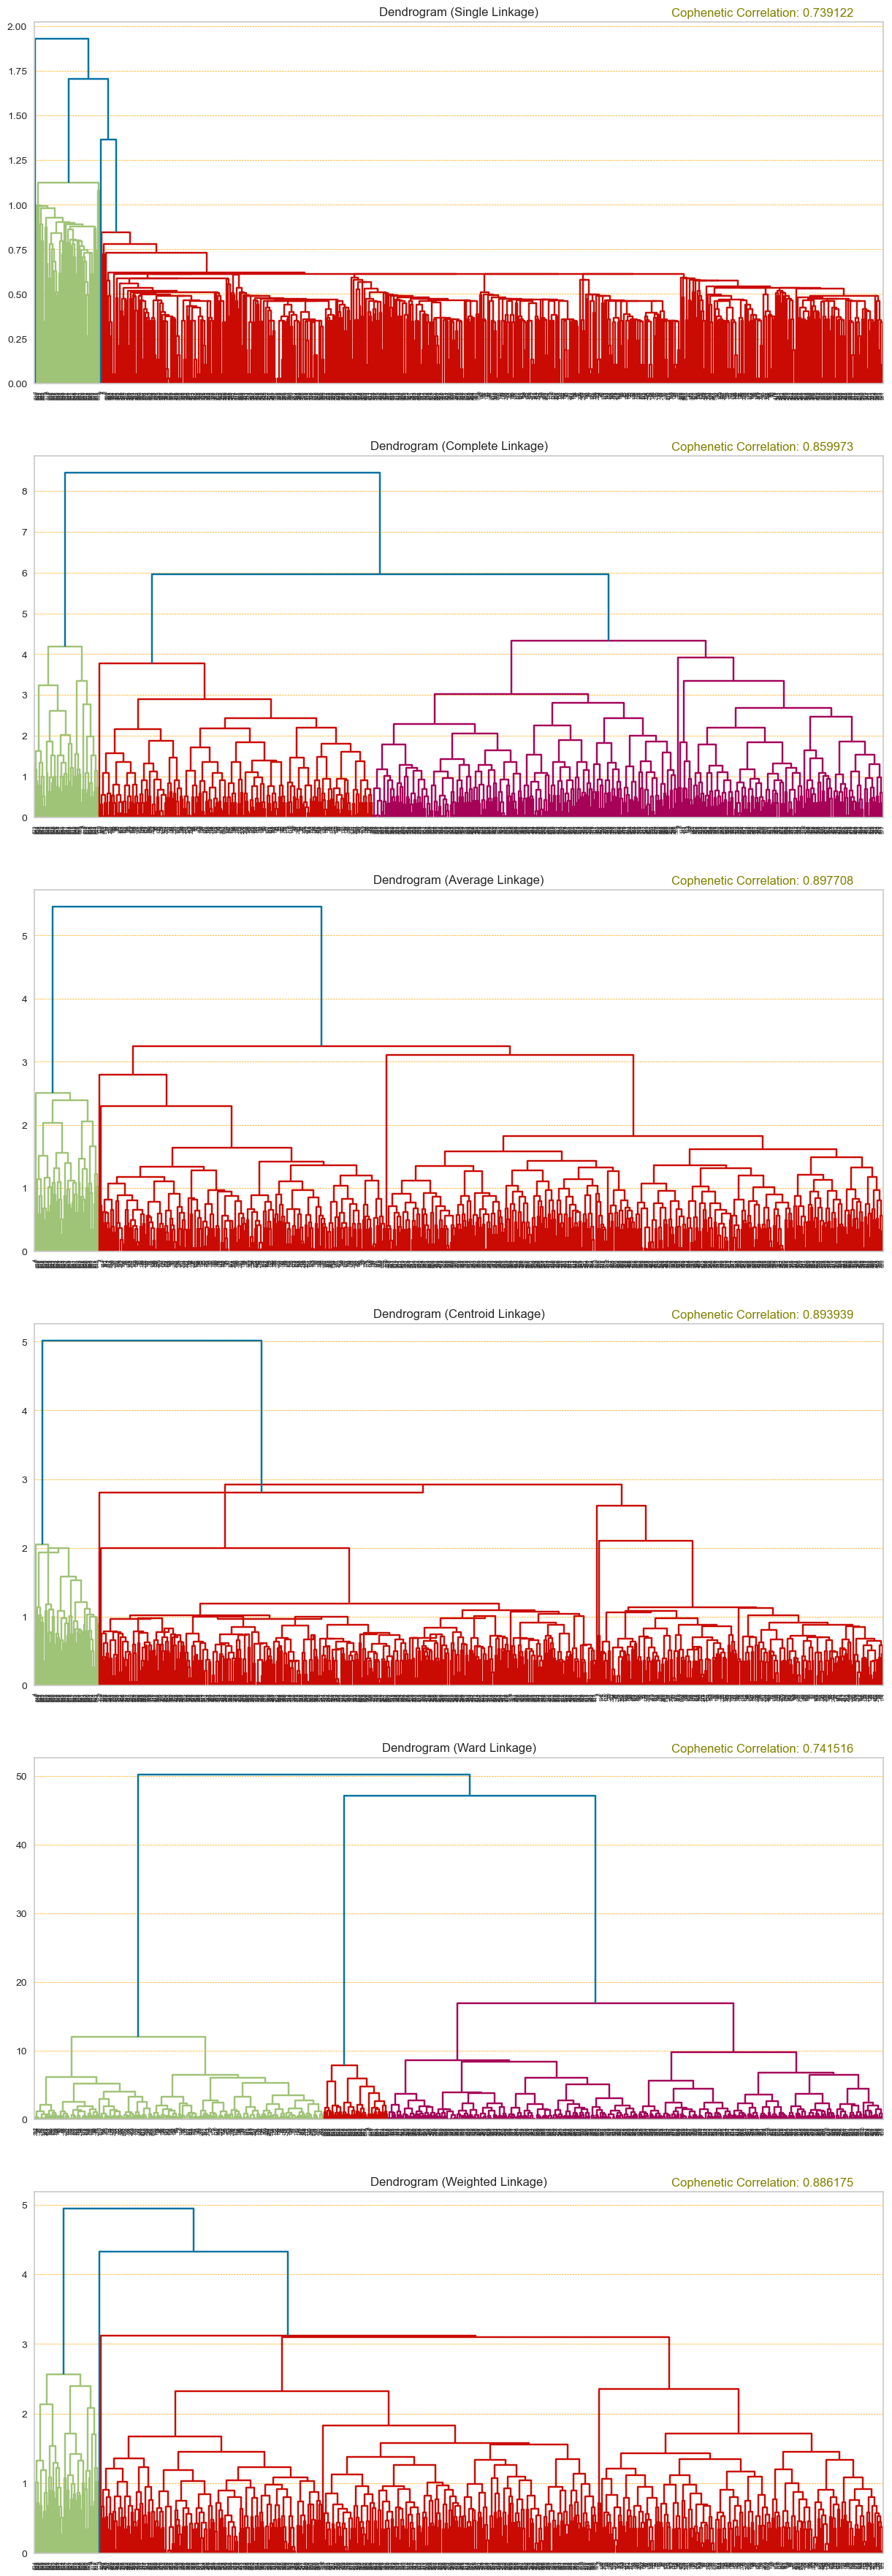

In [59]:
# Plotting the Dendrograms (Using Euclidean Distance and all Linkage Methods):

linkage_methods = ['single' , 'complete' , 'average' , 'centroid' , 'ward' , 'weighted']
compare_cols = ['Linkage' , 'Cophenetic Coefficient']

fig , axs = plt.subplots(len(linkage_methods) , 1 , figsize=(15 , 45))

for i , method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df_hc , metric='euclidean' , method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    axs[i].xaxis.grid(False)
    axs[i].yaxis.grid(color='orange' , linestyle='--' , linewidth=0.5)

    coph_corr , coph_dist = cophenet(Z , pdist(subset_scaled_df_hc))
    axs[i].annotate(f'Cophenetic Correlation: {coph_corr:0.6f}' , (0.75, 1.015) , xycoords='axes fraction' , color='olive')

<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Euclidean - Single Dendrogram**:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Threshold = 1.75 results in 2 Clusters, one of them has only 1 Data Point. <font color='red'> ***Very Weak Homogeneity***
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Threshold = 1.50 results in 3 Clusters, one of them has only 1 Data Point. <font color='red'> ***Very Weak Homogeneity***
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Threshold = 1.25 results in 4 Clusters, two of them has only 1 Data Point each. <font color='red'> ***Very Weak Homogeneity***
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** It's fair to say that Single Linkage Method will not result in the appropriate Distribution of Customers among Clusters since any Threshold used will lead keep forming Clusters with a single Data Point each.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Euclidean - Complete Dendrogram**:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Threshold = 8.0 results in 2 Clusters, one of them with quite small No. of Data Points comparing with the others. <font color='Orange'> ***Weak Homogeneity***
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Threshold = 5.0 results in 3 Clusters, one of them with small No. of Data Points comparing with the others. <font color='Green'> ***Good Homogeneity*** 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Threshold = 4.3 results in 4 Clusters, one of them with small No. of Data Points comparing with the others. <font color='Blue'> ***Very Good Homogeneity*** 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** It's fair to say that continuing in decreasing the Threshold is not practical and will divide Clusters that seem to be perfect at higher Threshold.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Euclidean - Average Dendrogram**:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Threshold = 5.0 results in 2 Clusters, one of them with quite small No. of Data Points comparing with the others. <font color='Orange'> ***Weak Homogeneity***
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Threshold = 3.2 results in 3 Clusters, one of them with small No. of Data Points comparing with the others. <font color='Green'> ***Good Homogeneity*** 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** It's fair to say that continuing in decreasing the Threshold is not practical and will lead to forming Clusters with either 1 or few Data Points.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Euclidean - Centroid Dendrogram**:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Threshold = 4.0 results in 2 Clusters, one of them with quite small No. of Data Points comparing with the others. <font color='Orange'> ***Weak Homogeneity***
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Threshold = 2.8 results in 4 Clusters, one of them has only 1 Data Point. <font color='red'> ***Very Weak Homogeneity***
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** It's fair to say that continuing in decreasing the Threshold is not practical and will lead to forming Clusters with either 1 or few Data Points.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Euclidean - Ward Dendrogram**:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Threshold = 48.0 results in 2 Clusters, one of them with has smaller No. of Data Points comparing with the other. <font color='Blue'> ***Very Good Homogeneity***
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Threshold = 40.0 results in 3 Clusters, one of them with quite small No. of Data Points comparing with the others. <font color='Green'> ***Good Homogeneity*** 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Threshold = 15.0 results in 4 Clusters, one of them has quite small No. of Data Points comparing with the others. <font color='Blue'> ***Very Good Homogeneity***
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** It's fair to say that continuing in decreasing the Threshold is not practical and will not lead to better modeling.  

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Euclidean - Weighted Dendrogram**:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Threshold = 4.5 results in 2 Clusters, one of them with has quite small No. of Data Points comparing with the other. <font color='Orange'> ***Weak Homogeneity***
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Threshold = 4.0 results in 3 Clusters, results in 3 Clusters, one of them has only 1 Data Point. <font color='red'> ***Very Weak Homogeneity***
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** It's fair to say that continuing in decreasing the Threshold is not practical and will keep forming Cluster with a single Data Point.

<left> <font size=5 style='font-family:Courier New' color='Blue'> **Conclusion:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **By neglecting any Combination of Euclidean Distance-Linkage Methods that result in Very Weak or Weak Homogeneity, we found that best grouping/Clustering is achieved by using:** 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Complete Linkage (K = 3): 1 Cluster (Left) has fewer Data Points comparing with other 2 Clusters.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Complete Linkage (K = 4): Difference between Clusters in terms of Data Points is less than what we achieved by using 3 Clusters.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Average Linkage (K = 3): Similar to Complete Linkage (K = 3) except more Data Points belong to the middle Cluster.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Ward Linkage (K = 2): Although No quite difference between Clusters in terms of Data Points, such Clustering will lead to simple and prone to Under-Fitting Model.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Ward Linkage (K = 3): Similar to Complete Linkage (K = 3) with approximate similar No. of more Data Points among Clusters but with different grouping of Data Points.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Ward Linkage (K = 4): Similar to Complete Linkage (K = 4) with approximate similar No. of more Data Points among Clusters.

<br> <left> <font size=3 style='font-family:Courier New' color='Blue'> **Optimal K (Hierarchical Clustering):**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Average Linkage with Threshold = 5.0 (K = 3) will be chosen due to:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** The Distribution of Attributes in Exploratory Data Analysis is found to have 3 Groups of Data Points.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Despite the similarity in the Clustering Mechanism between Average and Complete Linkage using K = 3, Average Linkage has a higher Cophenetic coefficient and lower intergroup variance than Complete Linkage.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Despite the similarity in the Clustering Mechanism between Average and Ward Linkage using K = 3, Average Linkage has a higher Cophenetic coefficient than Complete Linkage.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Although the Distance at which two of the Clusters have been merged is larger in Complete Linkage comparing with Average Linkage, such large Distance resulting from the Linkage Method itself (Complete Linkage is calculated based on the farthest Points) and will not have that much impact on the results in terms of Gaps between Clusters.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Both K = 2 and K = 4 is not practical based on our understanding of Dataset; Because of the inability to discuss the market segmentation with Business Owner, we will rely on our Exploratory Data Analysis to understand the Market specs and build the required expertise to decide the Optimal No. of Clusters.

In [60]:
# Creating the Hierarchical Model with the Optimal Value of K:
start_time = time.time()

model_hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model_hc.fit(subset_scaled_df_hc)
print(model_hc)

end_time = time.time()
elapsed_time = end_time - start_time
print('\033[94m' , '\n Execution Time = ', '{:.5f}'.format(elapsed_time), ' Seconds!' , sep='')

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

 Execution Time = 0.00907 Seconds!


In [61]:
# Adding new Column to label the Cluster for each Data Row in both Original and Scaled Data Frames:

df_hc['Cluster_Label'] = model_hc.labels_
subset_scaled_df_hc['Cluster_Label'] = model_hc.labels_

In [62]:
# Dispaying the Cluster Lables in Original Data Frames:

df_hc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Cluster_Label
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1


<left> <font size=5 style='font-family:Courier New' color='Blue'> **Profiling: KMeans Clustering**

In [63]:
# Profiling the KMeans Model:

model_kc_profile = df_kc.groupby('Cluster_Label').mean()
model_kc_profile.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
Cluster_Label,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,141040.000000,8.740000,0.600000,10.900000,1.080000


In [64]:
# Adding new Column to calculate the No. of Data Rows in each Cluster Label:

model_kc_profile['Cluster_Points'] = (df_kc.groupby('Cluster_Label')['Total_Credit_Cards'].count().values)
model_kc_profile.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Cluster_Points
Cluster_Label,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** All Features except the Total_Visits_Bank have shown a quite distinct Groups of Customers; However, the behaviour of Total_Visits_Bank is almost expected due to it's fair distribution among Customers whatever their Avg_Credit_Limit or Total_Credit_Cards.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** The No. of Data Points in each Cluster is acceptable. Despite the relatively small represenation of Customers in Cluster 2, such Cluster is quite important in grouping the current and future segment of VIP Customers who have high Credit Limit.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Extreme Values in both of Avg_Credit_Limit and Total_Visits_Online have important role in forming Cluster 2. Furthermore, high Averages of Total_Credit_Cards and Total_Visits_Bank have been merged in the same Cluster.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** Pair Plot and Exploratory Data Analysis have provided a strong evidence about the expected No. of Clusters.

<left> <font size=5 style='font-family:Courier New' color='Blue'> **Profiling: Hierarchical Clustering**

In [65]:
# Profiling the Hierarchical Model:

model_hc_profile = df_hc.groupby('Cluster_Label').mean()
model_hc_profile.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made
Cluster_Label,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408


In [66]:
# Adding new Column to calculate the No. of Data Rows in each Cluster Label:

model_hc_profile['Cluster_Points'] = (df_hc.groupby('Cluster_Label')['Total_Credit_Cards'].count().values)
model_hc_profile.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Cluster_Points
Cluster_Label,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


<left> <font size=5 style='font-family:Courier New' color='Grey'> **Observations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** All Features except the Total_Visits_Bank have shown a quite distinct Groups of Customers; However, the behaviour of Total_Visits_Bank is almost expected due to it's fair distribution among Customers whatever their Avg_Credit_Limit or Total_Credit_Cards.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** The No. of Data Points in each Cluster is acceptable. Despite the relatively small represenation of Customers in Cluster 1, such Cluster is quite important in grouping the current and future segment of VIP Customers who have high Credit Limit.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** Extreme Values in both of Avg_Credit_Limit and Total_Visits_Online have important role in forming Cluster 2. Furthermore, high Averages of Total_Credit_Cards and Total_Visits_Bank have been merged in the same Cluster.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** Pair Plot and Exploratory Data Analysis have provided a strong evidence about the expected No. of Clusters.

<left> <font size=5 style='font-family:Courier New' color='Blue'> **K-means vs Hierarchical Clustering:**

In [67]:
# KMeans Model Profile:

model_kc_profile.style.highlight_max(color='Yellow' , axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Cluster_Points
Cluster_Label,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [68]:
# Hierarchical Model Profile:

model_hc_profile.style.highlight_max(color='Lime' , axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_Visits_Bank,Total_Visits_Online,Total_Calls_Made,Cluster_Points
Cluster_Label,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


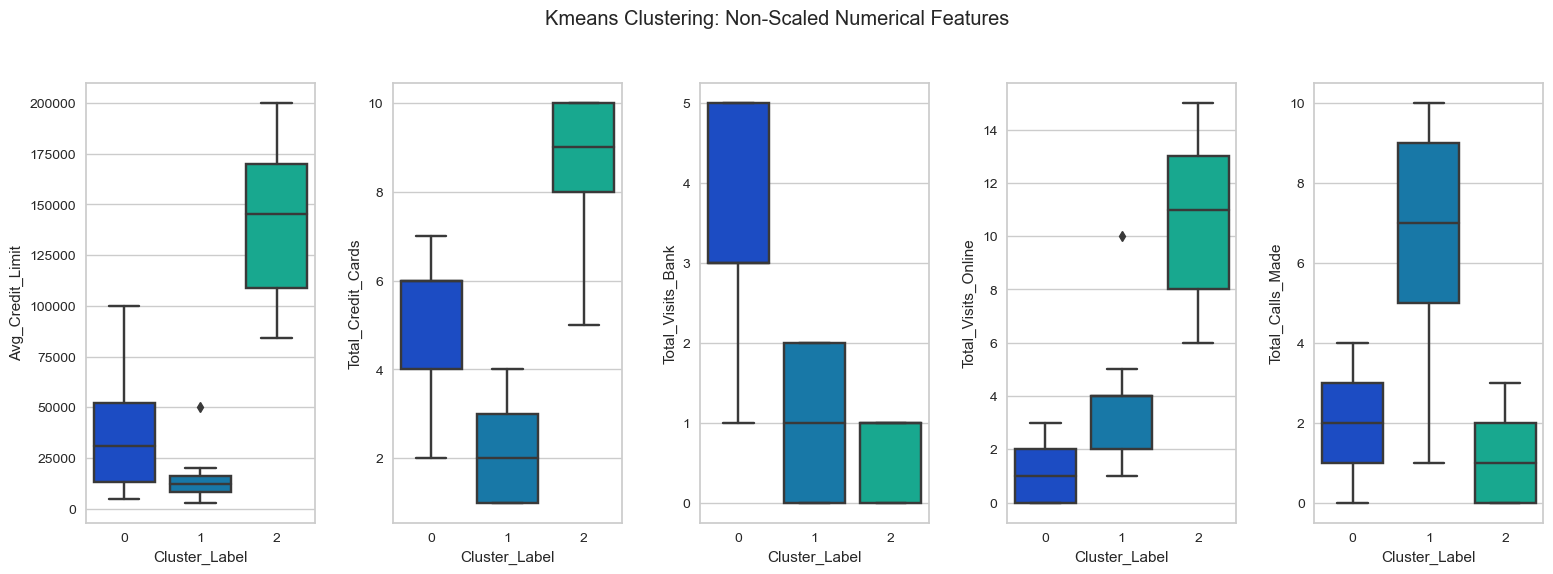

In [69]:
# Visualizing the Kmeans Clustering on Original (Non-Scaled) Data Frame:
    
fig , axes = plt.subplots(1 , 5 , figsize=(16 , 6))   
fig.suptitle('Kmeans Clustering: Non-Scaled Numerical Features')
counter = 0 

for i in range(5):                                    
    sns.boxplot(ax=axes[i] , x = df_kc['Cluster_Label'] , y = df_kc[numerics_list[counter]] , palette='winter')
    counter = counter + 1

fig.tight_layout(pad=2.0)

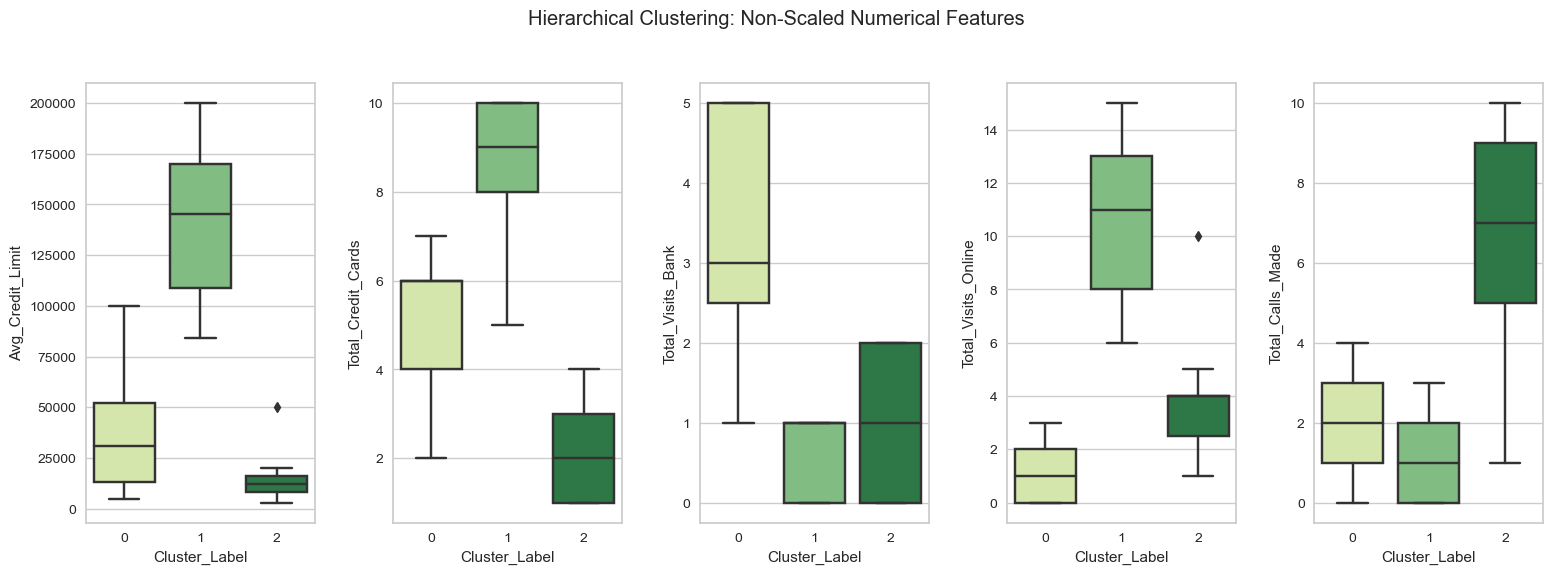

In [70]:
# Visualizing the Hierarchical Clustering on Original (Non-Scaled) Data Frame:
    
fig , axes = plt.subplots(1 , 5 , figsize=(16 , 6))   
fig.suptitle('Hierarchical Clustering: Non-Scaled Numerical Features')
counter = 0 

for i in range(5):                                    
    sns.boxplot(ax=axes[i] , x = df_hc['Cluster_Label'] , y = df_hc[numerics_list[counter]] , palette='YlGn')
    counter = counter + 1

fig.tight_layout(pad=2.0)

<left> <font size=5 style='font-family:Courier New' color='Blue'> **Comparison:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** Hierarchical Clustering looks faster then KMeans Clustering; While the time required to build and fit KMeans Model is 0.06x Secondes, it tooks only 0.009x Seconds to build and fit the Hierarchical Model (Time varies with small deviation on every execution).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** Both Hierarchical and KMeans Models show the best performance in terms of Performance Metrics and compatibility with Dataset Nature using 3 Clusters (K = 3).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** A very similar Clustering Mechanism is found between both Hierarchical and KMeans Models, both Models have segmented the Customer Attributes into groups with quite convergent Averages.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** It's well notice that the Cluster which contains Extreme Values is identical in both Hierarchical and KMeans Models in terms of Averages and No. of Data Points.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5:** The only major differences between Hierarchical and KMeans Models are the Index (Label) of Clusters and a the movement of 1 Data Point between 2 Clusters (KMeans: 224,386) to (Hierarchical: 223,387).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6:** Inspite of extreme similarity between both  Hierarchical and KMeans, Hierarchical shows slight improvement in increasing the distances between formed Cluster.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> ***Overall, both Hierarchical and KMeans Models represent an excellent choice to segment the Customers with negligible differences.***

<left> <font size=6 style='font-family:Courier New' color='Orange' > **7. Business Insights:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> Insights will be drawn using the Hierarchical Model as a reference (Both Model can be used due to convergent segmentation of Customer Attributes):

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Cluster 0**:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Contains 387 Customers (The highest Segment of Customers - 58.64%).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Contains the Customers who have Moderate No. of Credit Cards (Average $\approx$ 5) and average Credit Limits (Average $\approx$ 38,000) - Can be considered as Middle Income Customers.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Contains the Customers who neither prefer using the Online Banking Services (Average $\approx$ 1) nor Calling the Bank (Average $\approx$ 2).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Contains the Customers who prefer visiting the Bank (Average $\approx$ 3).

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Cluster 1**:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Contains 50 Customers (The lowest Segment of Customers - 7.58%).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Contains the Customers who have large No. of Credit Cards (Average $\approx$ 9) and high Credit Limits (Average $\approx$ 141,000) - Can be considered as High Income Customers - VIP.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Contains the Customers who neither prefer visiting the Bank (Average $\approx$ 1) nor Calling the Bank (Average $\approx$ 1).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Contains the Customers who prefer using the Online Banking Services (Average $\approx$ 11).

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **Cluster 2**:
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Contains 223 Customers (The middle Segment of Customers - 33.79%).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Contains the Customers who have small No. of Credit Cards (Average $\approx$ 2) and low Credit Limits (Average $\approx$ 12,000) - Can be considered as Limited/Low Income Customers.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Contains the Customers who neither prefer Visiting the Bank (Average $\approx$ 1) nor using the Online Banking Services (Average $\approx$ 3).
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Contains the Customers who prefer Calling the Bank (Average $\approx$ 7).

<left> <font size=6 style='font-family:Courier New' color='Orange' > **8. Business Recommendations:**
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **1:** At the outset, it would be helpful to guide the business owner 'AllLife Bank' into the 3 segments/groups of customers he has: 
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Cluster 0: Customers who have average Credit Limits, medium No. of Credit Cards ($\approx$ 4 - 7), and visit the Bank personally more than others.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Cluster 1: Customers who have high Credit Limits, large No. of Credit Cards ($\approx$ 8 - 10), and use the Online Banking Services more than others.
<br> <left> <font size=3 style='font-family:Courier New' color='black'> **-** Cluster 2: Customers who have low Credit Limits, small No. of Credit Cards ($\approx$ 1 - 3), and call the Bank more than others.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **2:** The small representation of VIP Customers who have large No. of Credit Cards (Between 8 and 10) is well noted with only 50 Customers $\approx$ 6% of Customers Base. Such Customers fall in Cluster # 1 which can be considered as the VIP Customers Cluster.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **3:** VIP Customers must be the core concern of Bank's Team; It is worthy to expect that such segment of Customers are business makers who don't have the enough time to visit the Bank Branches personally and prefer to use the Online Banking Services to save their valuable time. Accordingly, enhancing such services in a way that attract them and making them feel comfortable is an excellent approach.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **4:** In addition to the above assumption, Business Owner must take into consideration that inappropriate services might cause VIP customers to refrain from visiting the bank; Hence, VIP Customer Lounge and dedicated account manager may help in strengthen their trust and loyalty in Bank Services as well as encouraging them to visit the Bank to explore other Bank services and products.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **5:** Although Digital Services and 24/7 On-Call Support is an essential part in Service Providers like Banks; Visiting the Bank constitute a valuable opportunity for Customer Service Team to sit with Customers, understanding their needs in better way, and to offer them different kind of products and solutions - It's almost always difficult to do such activities in On-Site Visits.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **6:** In order to find the weaknesses points in banking services, customer satisfaction surveys should be conducted to discover the deficiencies and treat them accordingly.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **7:** In addition to above survey, knowing the actual User/Holder of Credit Cards might help in developing the Marketing Plans; An assumption that Customers - Espicially those with large No. of Credit Cards - have issued such Credit Cards to a Family Member is valid. Thus, features and discount programs will be assigned based on User's Type and interests.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **8:** It would be an excellent proactive approach to investigate the Clusters in which the Customers have never used one or more of the Contact channels (Ex.: Some Customers in Cluster 1 and have neither visited the Bank nor called it!), such investigation might discover the reason and draw the appropriate marketing and remedy plans.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **9:** Marketing plans to attract new Customers can be built on current Customers behaviour; Demonstrate the flexibility and reliability of Online Banking Services to VIP Customers, 24/7 uninterrupted support of Phone Banking Services to Limited-Income Customers, and easy to reach Bank Branches to Medium-Income Customers.   

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **10:** Logically, Online Banking Services and Visits are the only ways to make transactions; Thus, Bank Management must assume that calls are almost contain complains or requests for help. Therefore, a deep auditing on calls contents to verify whether a customer complain/query has been resolved successfully will have a great impact in maintaining the trust between Bank and Customers.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **11:** In general, training the front office staff on the best practices of customer services is essential to enhance their competence in dealing with customers; In addition, making sure that they have the deep and enough understanding of all Bank regulations, policies, and products will result in a quite decrease in the time they might need to understand and solve the customer queries.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **12:** Overall, 'AllLife Bank' Management is in a real challenge to work intensively to enhance their services; such enhancements will be fruitful in keeping the current customers and avoid losing them to competitors, be able to move part of them from lower to higher groups, as well as owing the power to attract new customers from the local market.

<br> <left> <font size=3 style='font-family:Courier New' color='black'> **13:** At the end, we were able to segment the customers of 'AllLife Bank' into 3 almost distinct groups; Such segmentation will be helpful to direct the efforts of Marketing Team to hunt the opportunities by deeply understanding of customers tend and behaviour in each group. Anyway, Segmentation is a continuous process and we strongly advice the Bank Team to update the Segmentation - Dynamic Clustering - periodically to keep abreast of any change in Customers behaviour and to catch the movements between groups in order to update the visions and plans accordingly!